# Problem Statement:

Avocado is a fruit consumed by people heavily in the United States.

Content

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file.

In [1]:
#Lets import necessory libraries
import pandas as pd
import numpy as np

#For Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import plotly
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Lets load the dataset
data=pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/avocado.csv")
data.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [3]:
#Lets check the shape of the dataset
data.shape

(18249, 14)

So ,Here we have 18249 rows and 14 Columns

In [4]:
#lets check for unique values
data.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [5]:
#Lets check for Null Values
data.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

So, Here we dont have any null values. we are good to proceed.

In [6]:
#Lets check the shape of the dataset
data.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Here We have ,

Date, Region and Type -> Object Type

Year -> Integer Type

and Left columns are Float Type .

Here we have to convert Date in Date Time Format

In [7]:
# Changing date column from object type to Date Type
data['Date']=pd.to_datetime(data['Date'])

In [8]:
#Checking the datatypes again
data.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

Now , We can see that We convert object data into Datetime . Lets separate them in Date and Month We dont separate year because we already have separate year column

In [9]:
# Now Seperate date and month
data["Month"] = data["Date"].dt.month
data["Day"] = data["Date"].dt.day
data.drop("Date",axis=1,inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
 13  Month         18249 non-null  int64  
 14  Day           18249 non-null  int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 2.1+ MB


In [11]:
#Lets delete Unnecessary Column ("Unnamed: 0")
data.drop(columns="Unnamed: 0",inplace=True)
data.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  year  region  Month  Day  
0     8603.62       93.25          0.0  conventional  2015  Albany     12   27  
1     9408.07       97.49          0.0  conventional  2015  Albany     12   20  
2     8042.21      103.14          0.0  conventional  2015  Albany     12   13  
3     5677.40      133.76          0.0  conventional  2015  Albany     12    6  
4     5986.26      197.69          0.0  conventional  2015  Albany     11   29

So , Here we removed [Unnamed: 0] .

In [12]:
#Checking for duplicate values

data.drop_duplicates(inplace=True)
data.shape

(18249, 14)

Here we can see that we dont have any Duplicates.

In [13]:
#Lets Describe the Dataset
data.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  \
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000   
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899   
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000   
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000   
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000   
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000   
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000   

              Month           Day  
count  18249.000000  18249.000000  
mean       6.177215     15.662612  
std        3.534130      8.776281  
min        1.000000      1.000000  
25%        3.000000      8.000000  
50%        6.000000     16.000000  
75%        9.000000     23.000000  
max       12.000000     31.000000

Observations
- No missing values in the dataset.
- 12 numerical columns and 2 object columns
- And i also dont see any outliers . but we not sure . 

In [14]:
#Lets Describe the Dataset include object
data.describe(include='O')

type  region
count          18249   18249
unique             2      54
top     conventional  Albany
freq            9126     338

# EDA (Exploratory Data Analysis)

In [15]:
data['year'].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

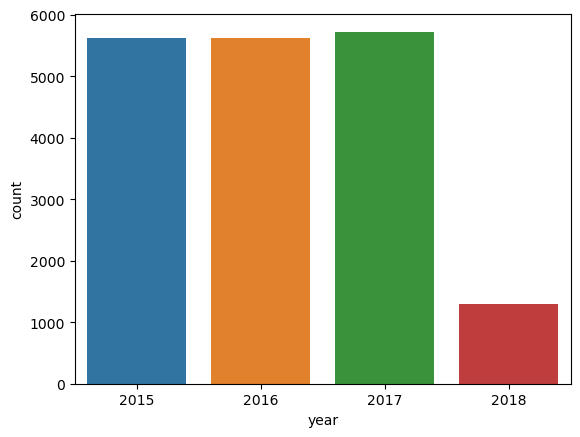

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [16]:
#Lets plot Year
sns.countplot(x='year',data=data)
plt.show()
data['year'].value_counts()

In ,

2015 -> 5615

2016 -> 5616

2017 -> 5722

2018 -> 1296

conventional    9126
organic         9123
Name: type, dtype: int64


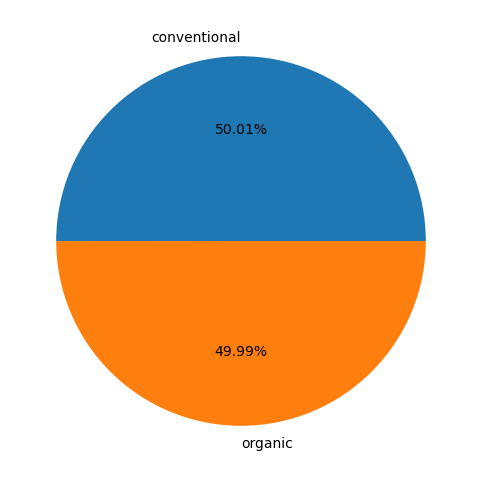

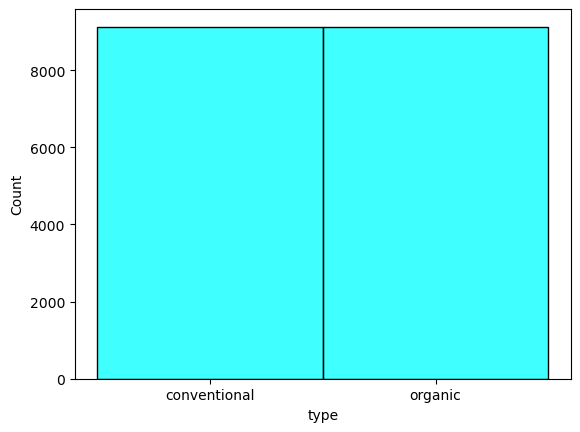

In [17]:
#Visualize the count of 'type'feature of the avocado
print(data["type"].value_counts())
labels='conventional','organic'
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(data['type'].value_counts(), labels=labels, autopct='%1.2f%%')

plt.show()
sns.histplot(data = data, x = 'type', stat = 'count', color = 'Cyan', legend = True)
plt.show()

So, Here we observe that count of type of Avocado

Conventional 9126

Organic 9123

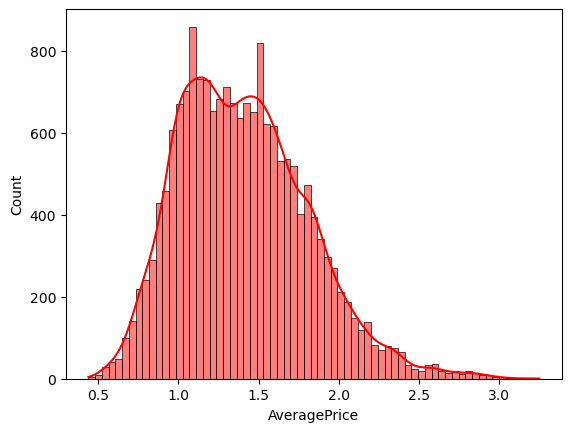

In [18]:
#Lets plot AveragePrice
sns.histplot(x='AveragePrice',data=data,kde=True,color='red')
plt.show()

So, Here we can see that Total Volume is a not a normally distributed. its a right skewed

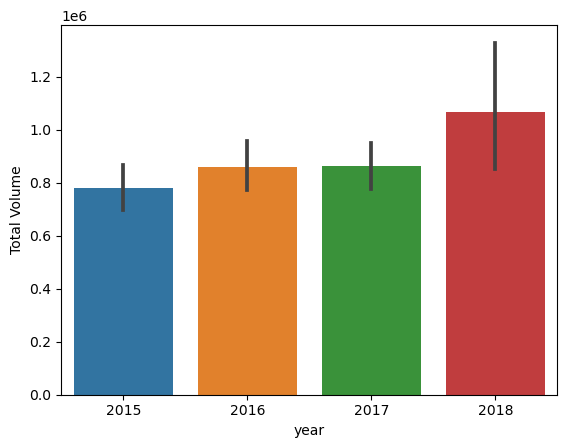

In [19]:
# we have records of sales of Avacado in 2015-2018 year
sns.barplot(y='Total Volume',x='year', data=data)
plt.show()

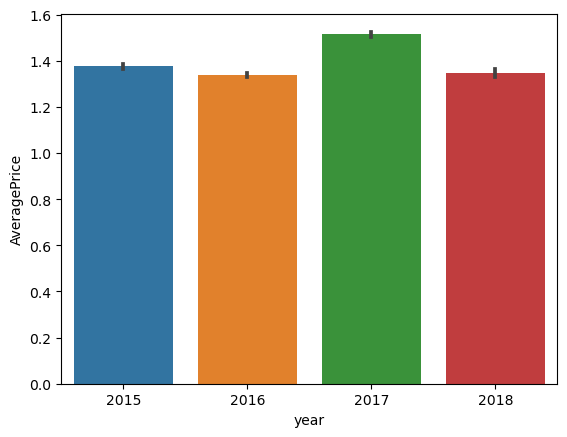

In [20]:
# we have records of sales of Avacado in 2015-2018 year
sns.barplot(y='AveragePrice',x='year', data=data)
plt.show()

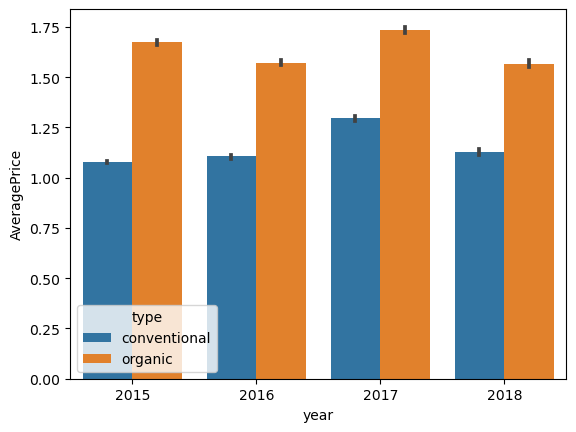

In [21]:
# Total sale by year by type
sns.barplot(y='AveragePrice',x='year',hue='type', data=data)
plt.show()

In [22]:
# Find Average price by type of avacado

data.groupby('type')['AveragePrice'].mean()

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

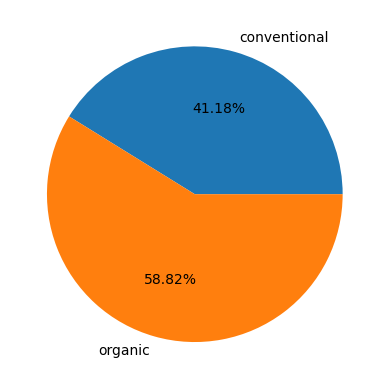

In [23]:
plt.pie( data.groupby('type')['AveragePrice'].mean().values, labels= data.groupby('type')['AveragePrice'].mean().index, autopct='%1.2f%%'  )
plt.show()

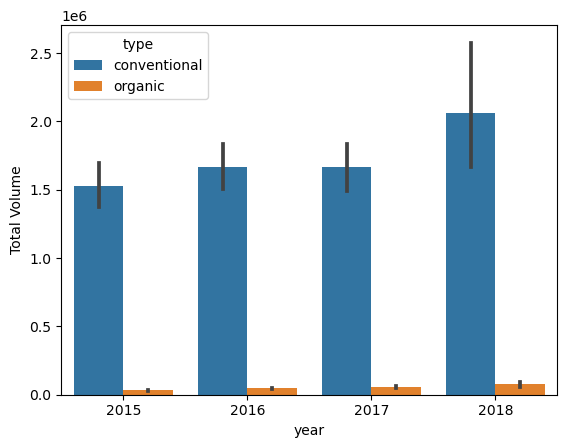

In [24]:
# Total sale by year by type
sns.barplot(y='Total Volume',x='year',hue='type', data=data)
plt.show()


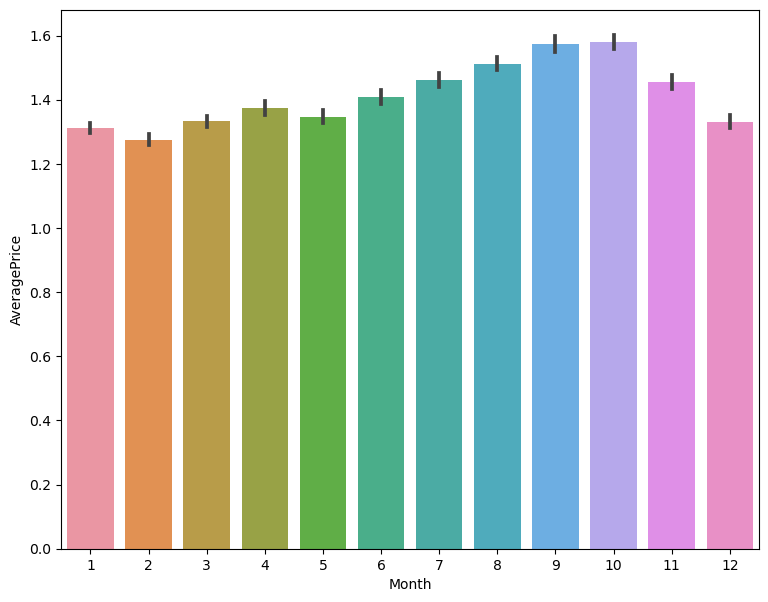

In [25]:
# we have records of sales of Avacado in monthly
plt.figure(figsize=(9,7))
sns.barplot(y='AveragePrice',x='Month', data=data)
plt.show()

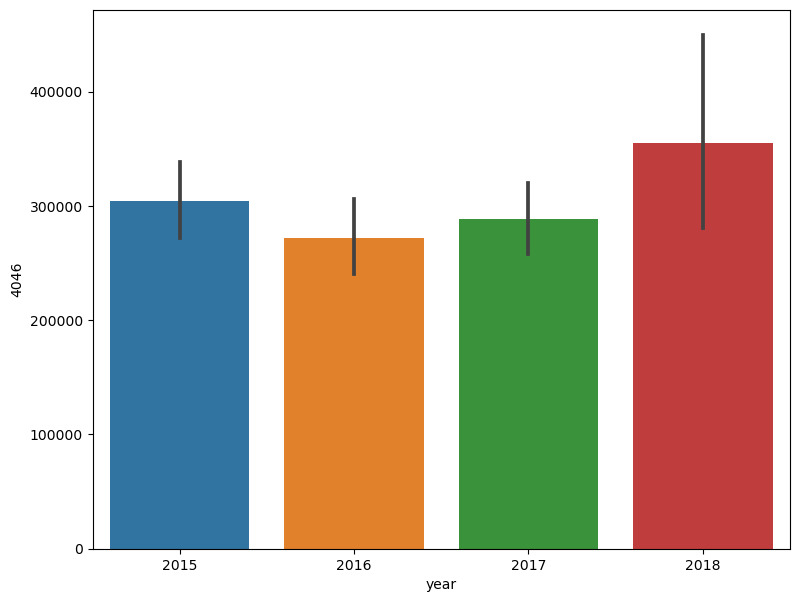

In [26]:
#Lets plot 4046 with year
plt.figure(figsize=(9,7))
sns.barplot(y='4046',x='year', data=data)
plt.show()

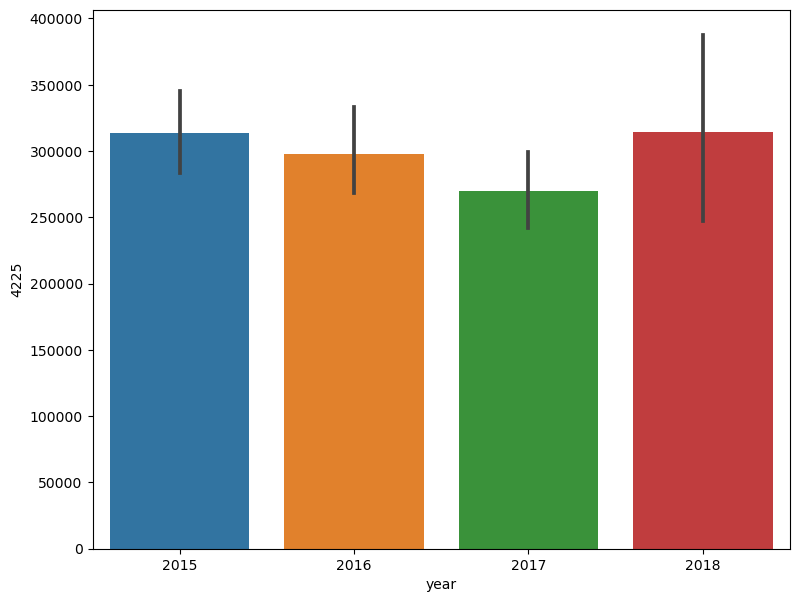

In [27]:
#Lets plot 4225 with year
plt.figure(figsize=(9,7))
sns.barplot(y='4225',x='year', data=data)
plt.show()

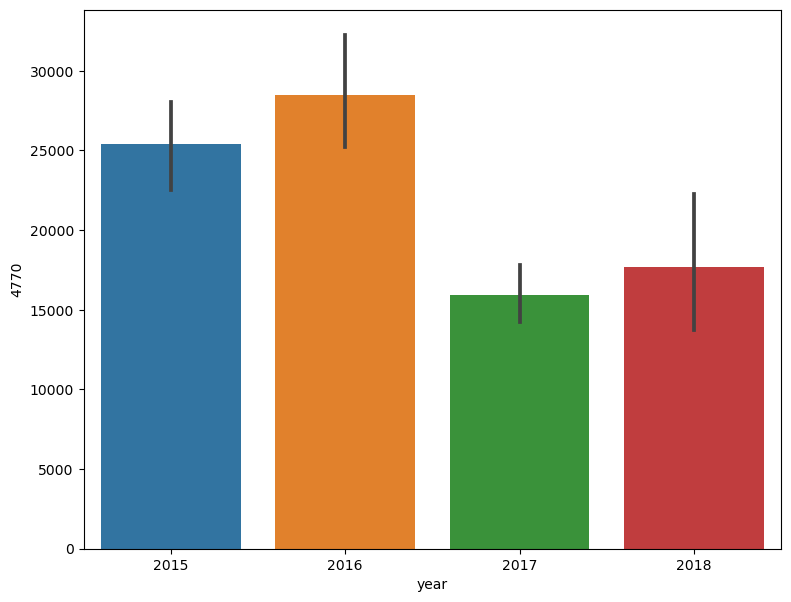

In [28]:
#Lets plot 4770 with year
plt.figure(figsize=(9,7))
sns.barplot(y='4770',x='year', data=data)
plt.show()

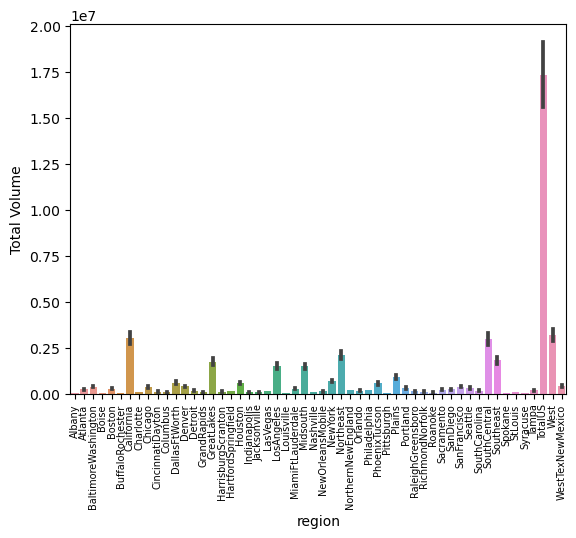

In [29]:
# we have records of sales of Avacado in region

sns.barplot(y='Total Volume',x='region', data=data)
plt.xticks(rotation=90,size=7)
plt.show()

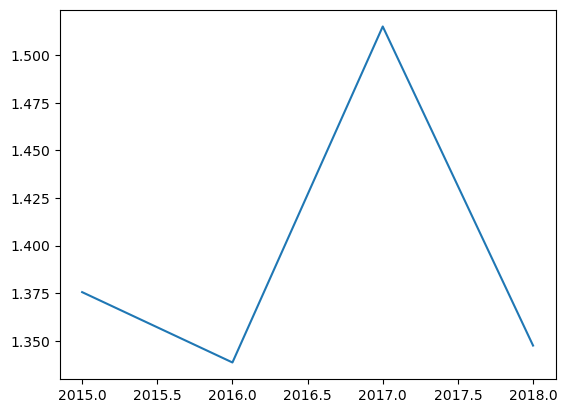

In [30]:
#Lets groupby year with avegrage prome mean
plt.plot(data.groupby('year')['AveragePrice'].mean().index, data.groupby('year')['AveragePrice'].mean().values)
plt.show()

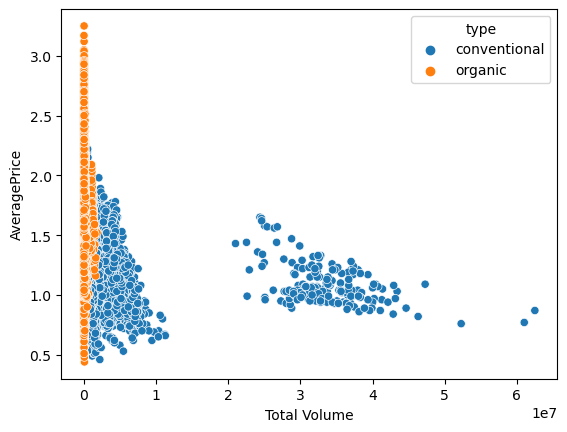

In [31]:
#Lets plor total volumne and average price with type
sns.scatterplot('Total Volume','AveragePrice',hue='type',data=data)
plt.show()

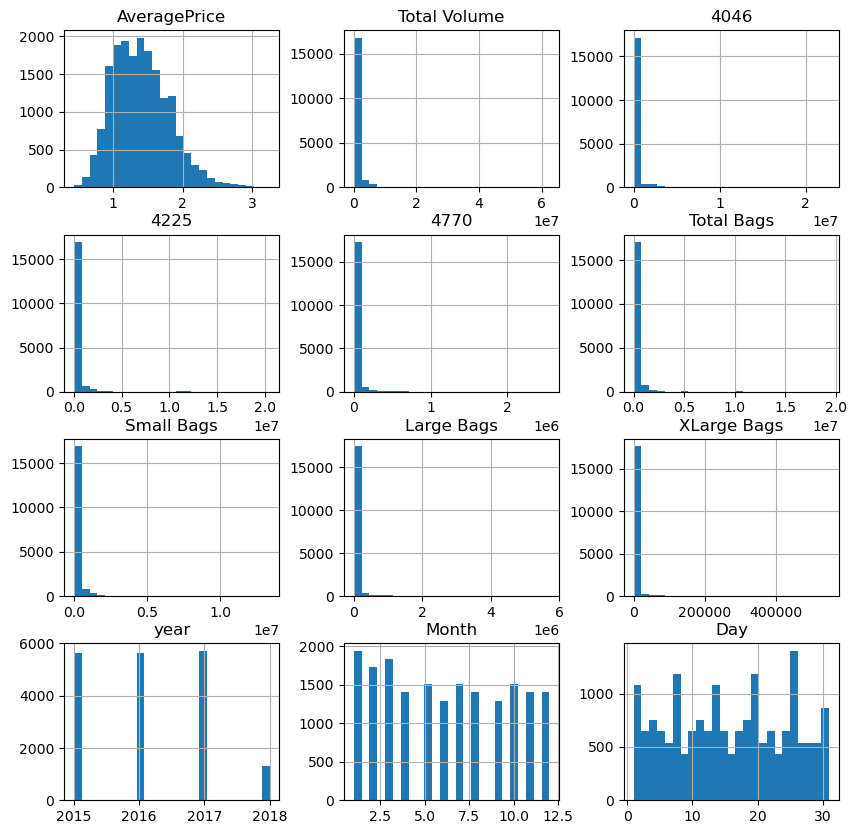

In [32]:
#Lets plot hist plot for all the data
data.hist(figsize=(10,10), bins=25)
plt.show()

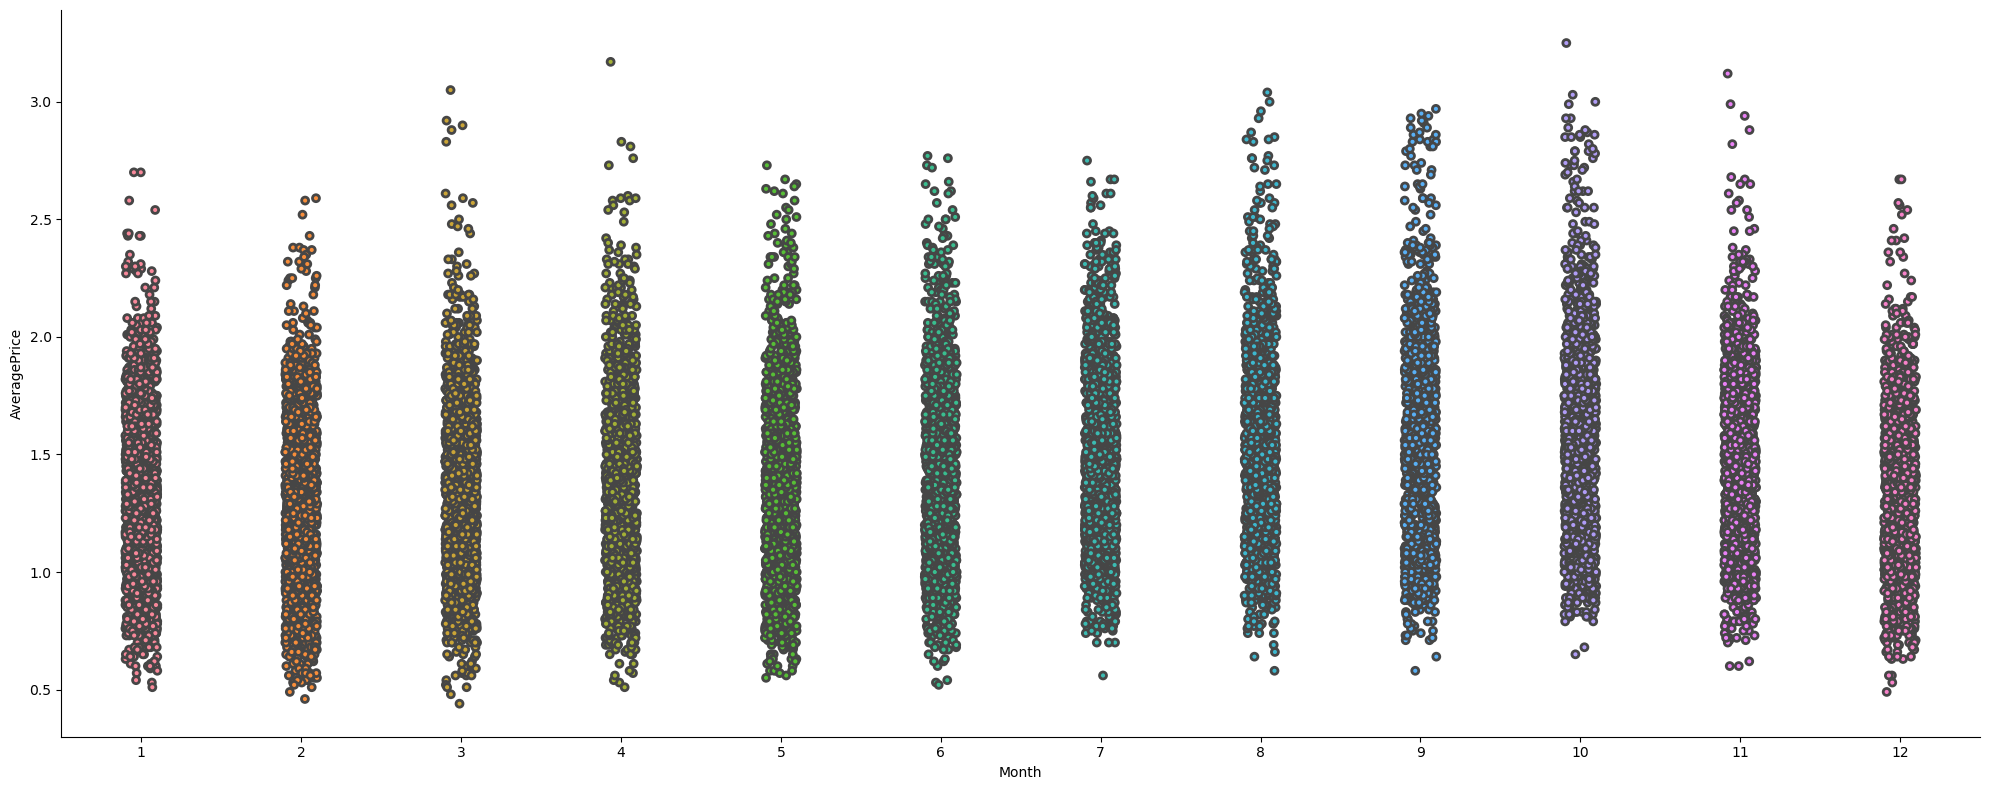

In [33]:
# Relationship between Average Price and Month
sns.catplot(x = "Month", y = "AveragePrice", kind="strip",data=data,height=8, linewidth=2, aspect=2.5)
plt.show()

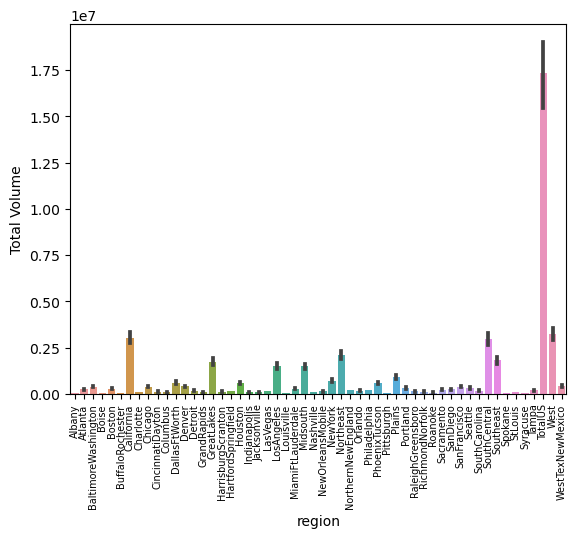

In [34]:
#Lets plot Total Volume with region
sns.barplot(y='Total Volume',x='region', data=data)
plt.xticks(rotation=90,size=7)
plt.show()

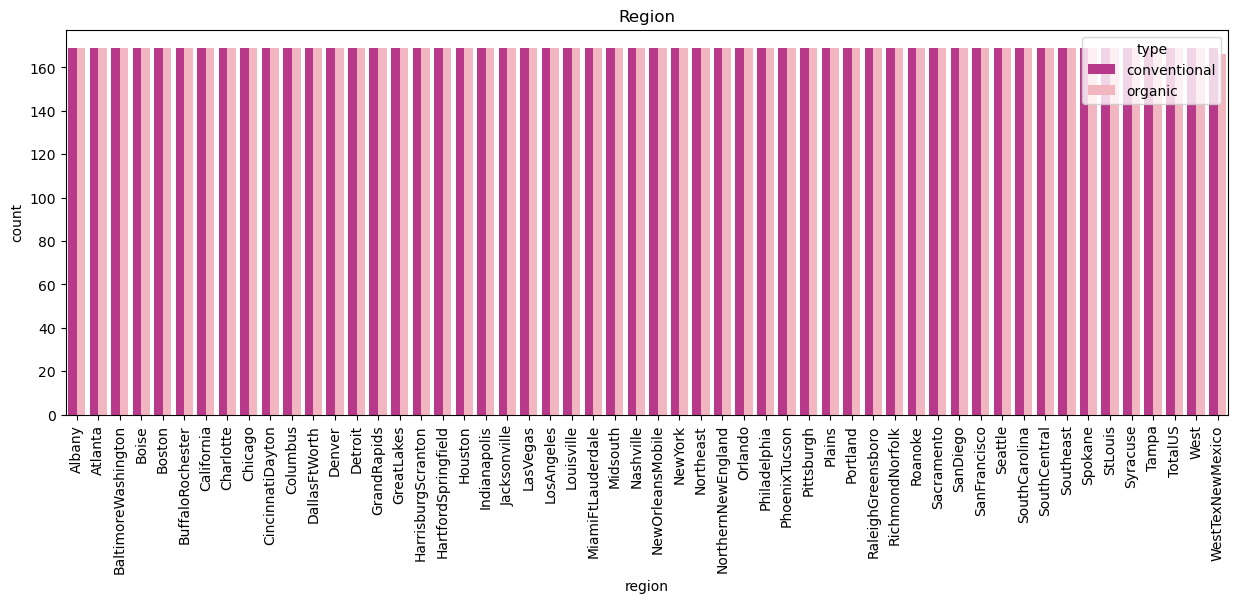

In [35]:
#Visualize the count of Region
plt.figure(figsize=(15,5))
sns.countplot(data["region"],palette="RdPu_r",hue=data['type'])
plt.title("Region")
plt.xticks(rotation=90)
plt.show()

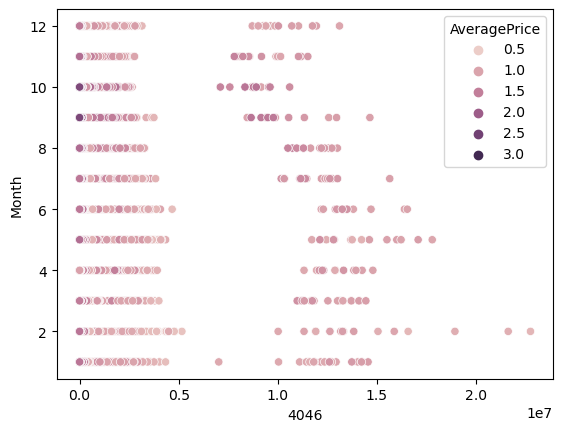

In [36]:
# average price as hue and months vs 4046
sns.scatterplot(x = "4046", y = "Month",hue='AveragePrice',data=data)
plt.show()

# The relation between each other by ploting pair pot:

<Figure size 2500x2500 with 0 Axes>

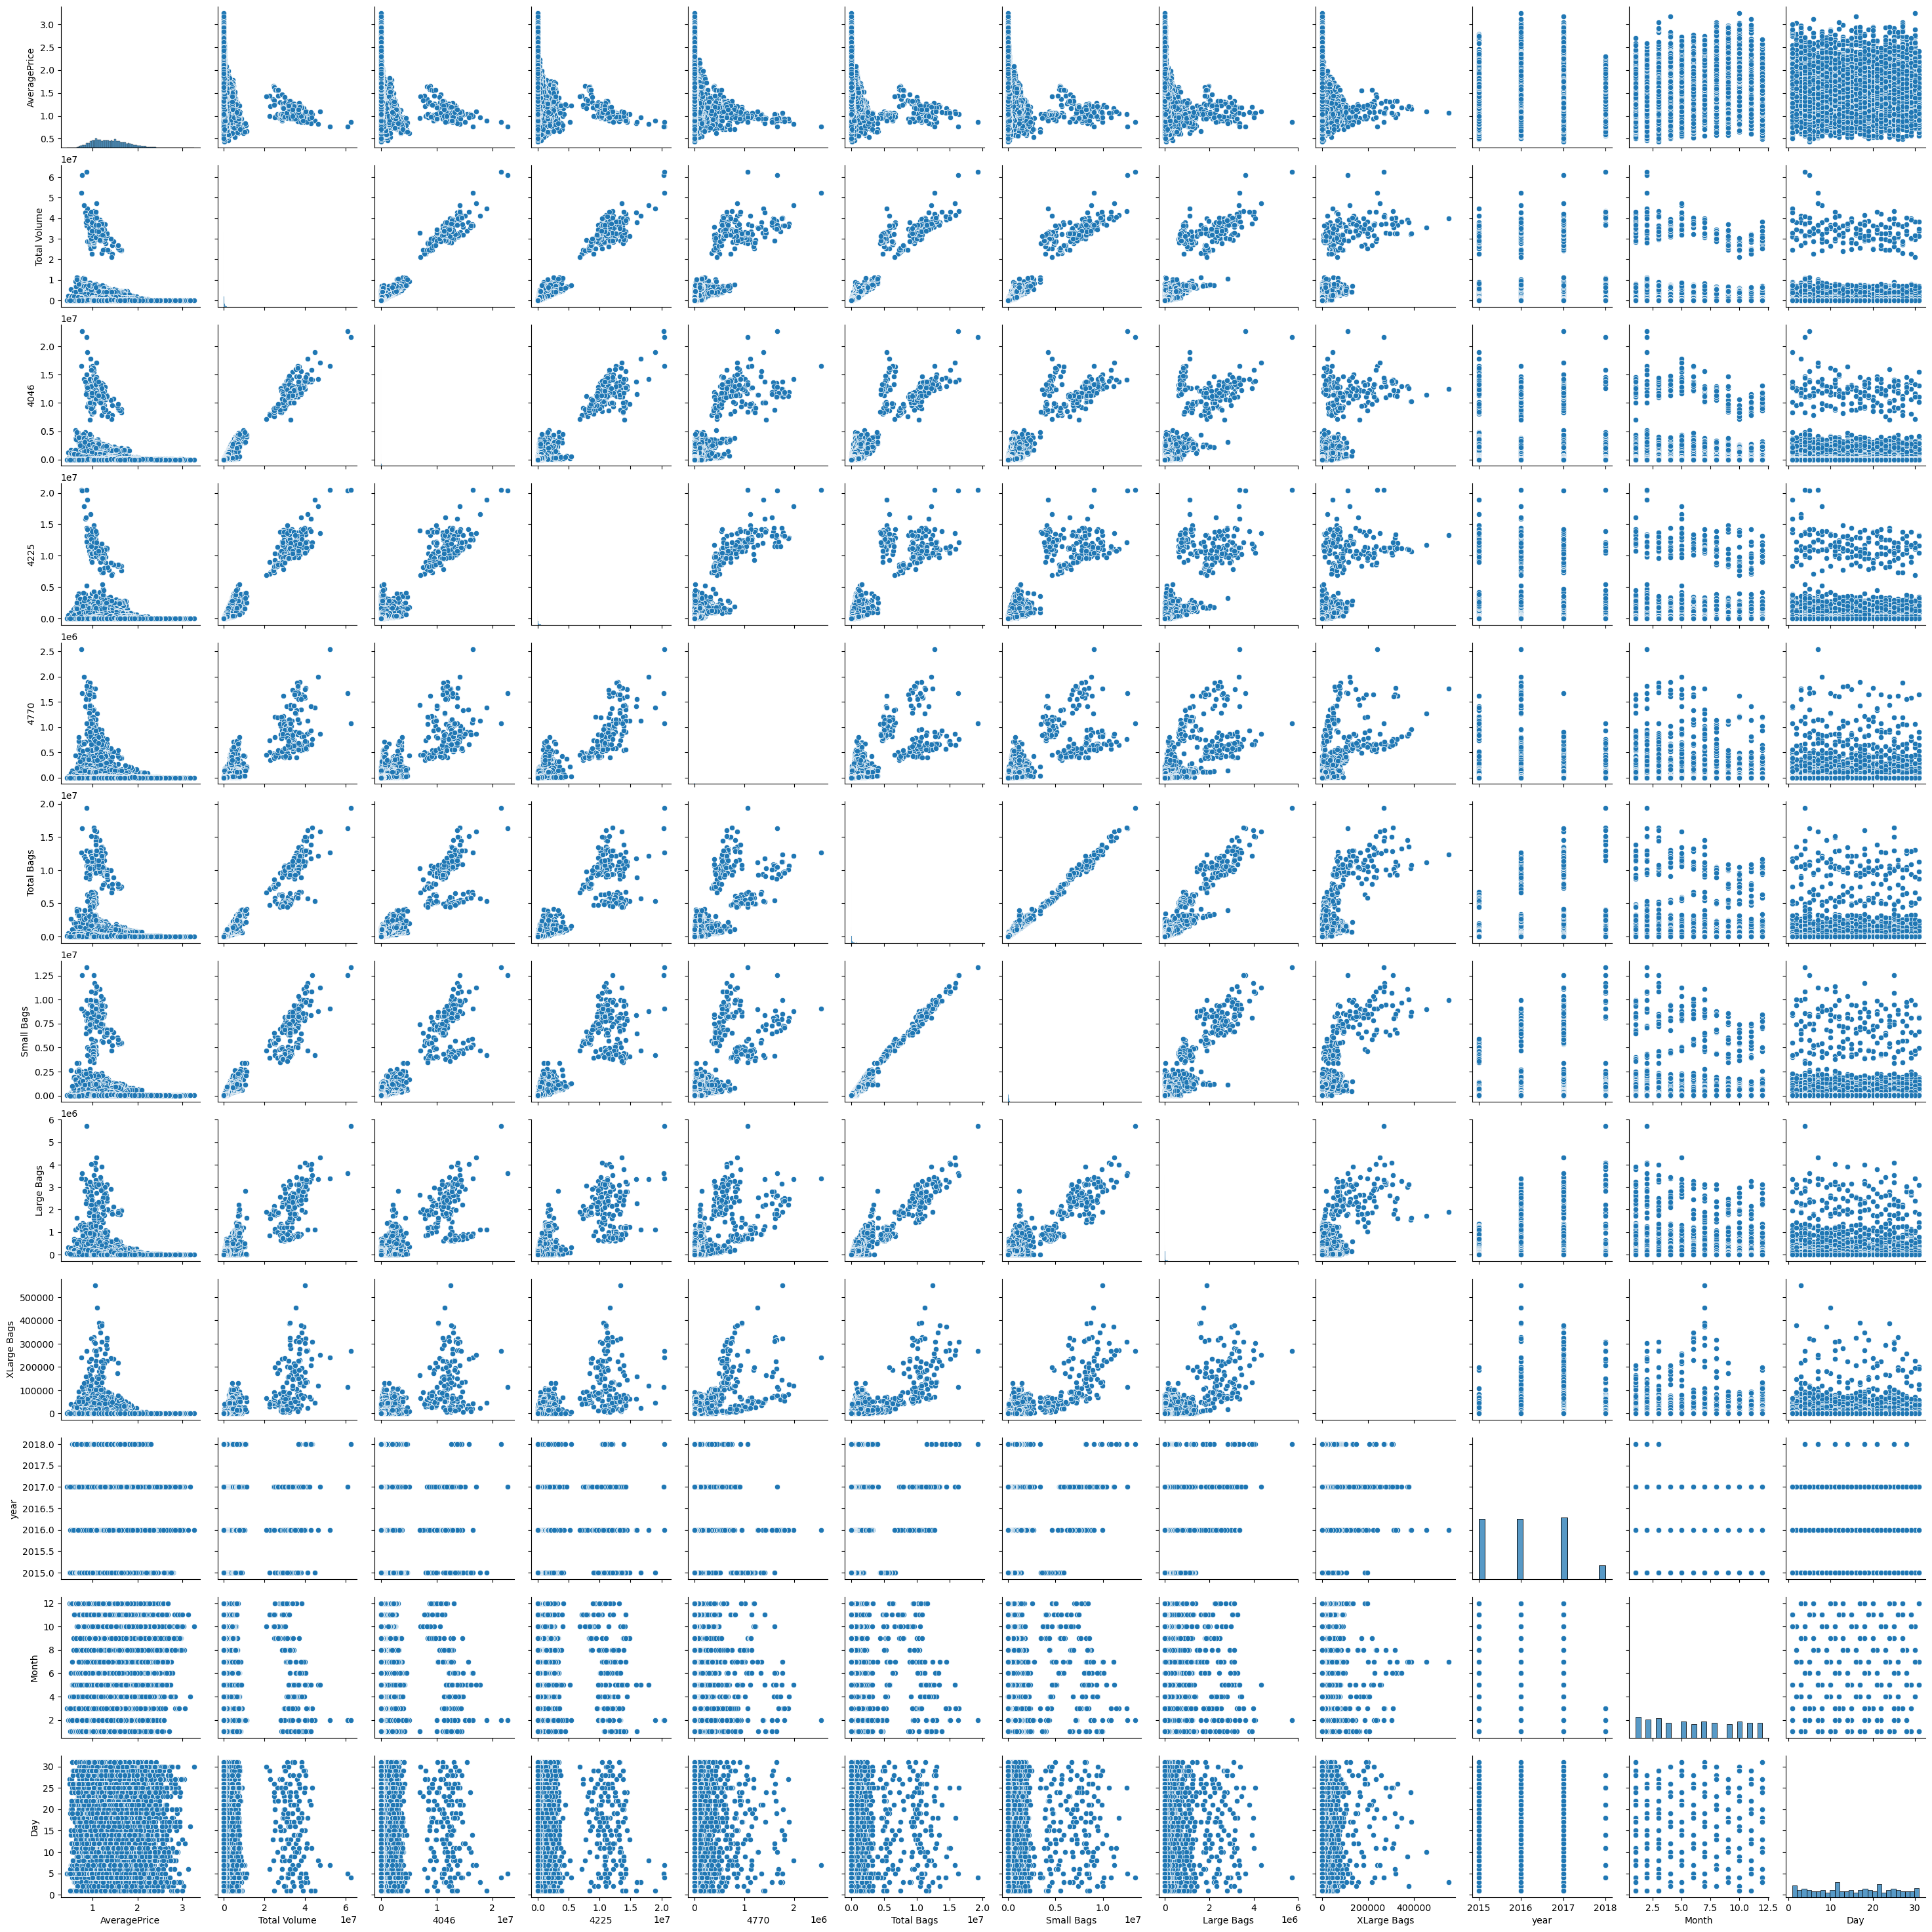

In [37]:
plt.figure(figsize=(25,25))
sns.pairplot(data)
plt.show()

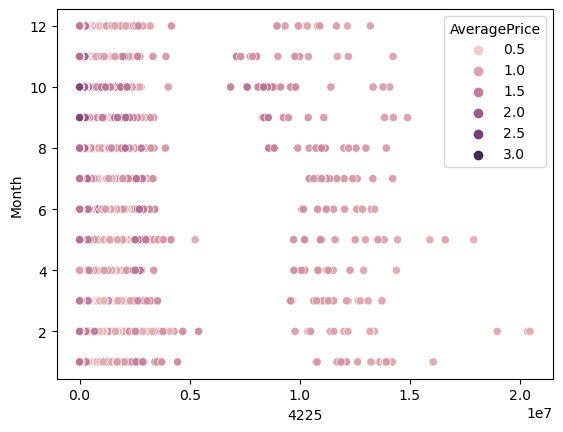

In [38]:
# average price as hue and months vs 4225
sns.scatterplot(x = "4225", y = "Month",hue='AveragePrice',data=data)
plt.show()

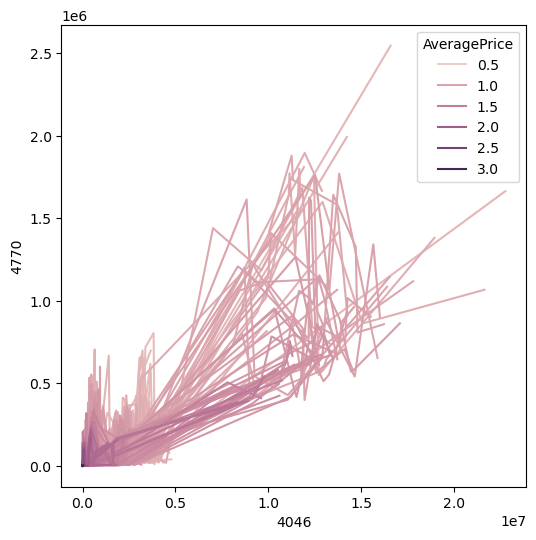

In [39]:
#let us plot line plot of 4046,4770 
plt.figure(figsize=(6,6))
sns.lineplot('4046','4770',data=data,hue='AveragePrice')
plt.show()

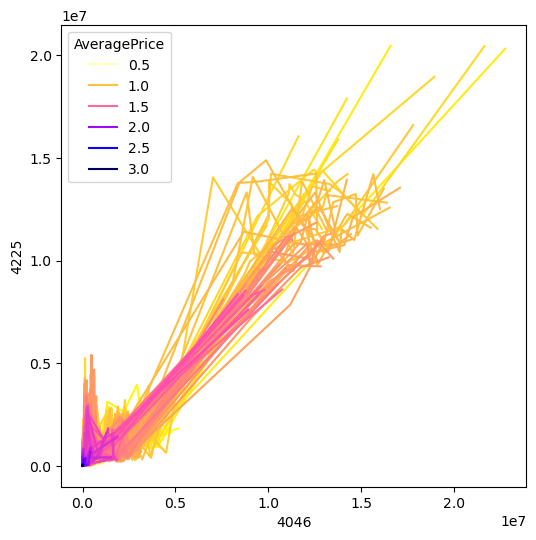

In [40]:
#let us plot line plot of 4046,4225
plt.figure(figsize=(6,6))
sns.lineplot('4046','4225',data=data,hue='AveragePrice',palette='gnuplot2_r')
plt.show()

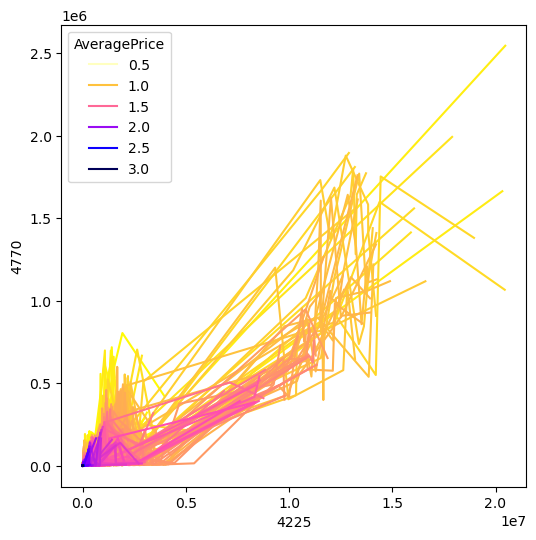

In [41]:
# Lets plot 4225 and 4770 with Average price
plt.figure(figsize=(6,6))
sns.lineplot('4225','4770',data=data,palette='gnuplot2_r',hue='AveragePrice')
plt.show()

# Relationship between year and Total volume:

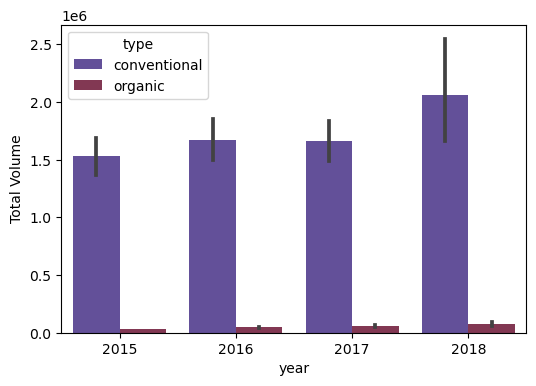

In [42]:
#Lets plot year and total volume with type
plt.figure(figsize=(6,4))
sns.barplot(x='year',y='Total Volume',hue="type",data=data,palette="twilight")
plt.show()

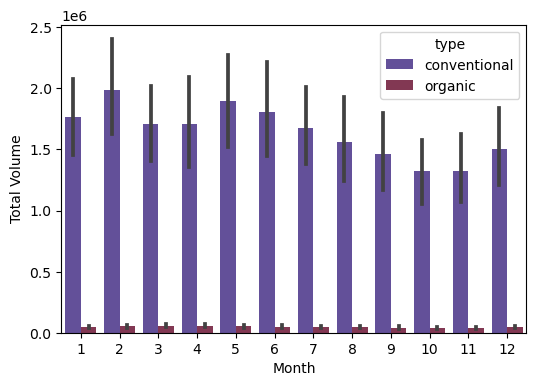

In [43]:
#Lets plot bar plot month and total volume with type
plt.figure(figsize=(6,4))
sns.barplot(x='Month',y='Total Volume',hue="type",data=data,palette="twilight")
plt.show()

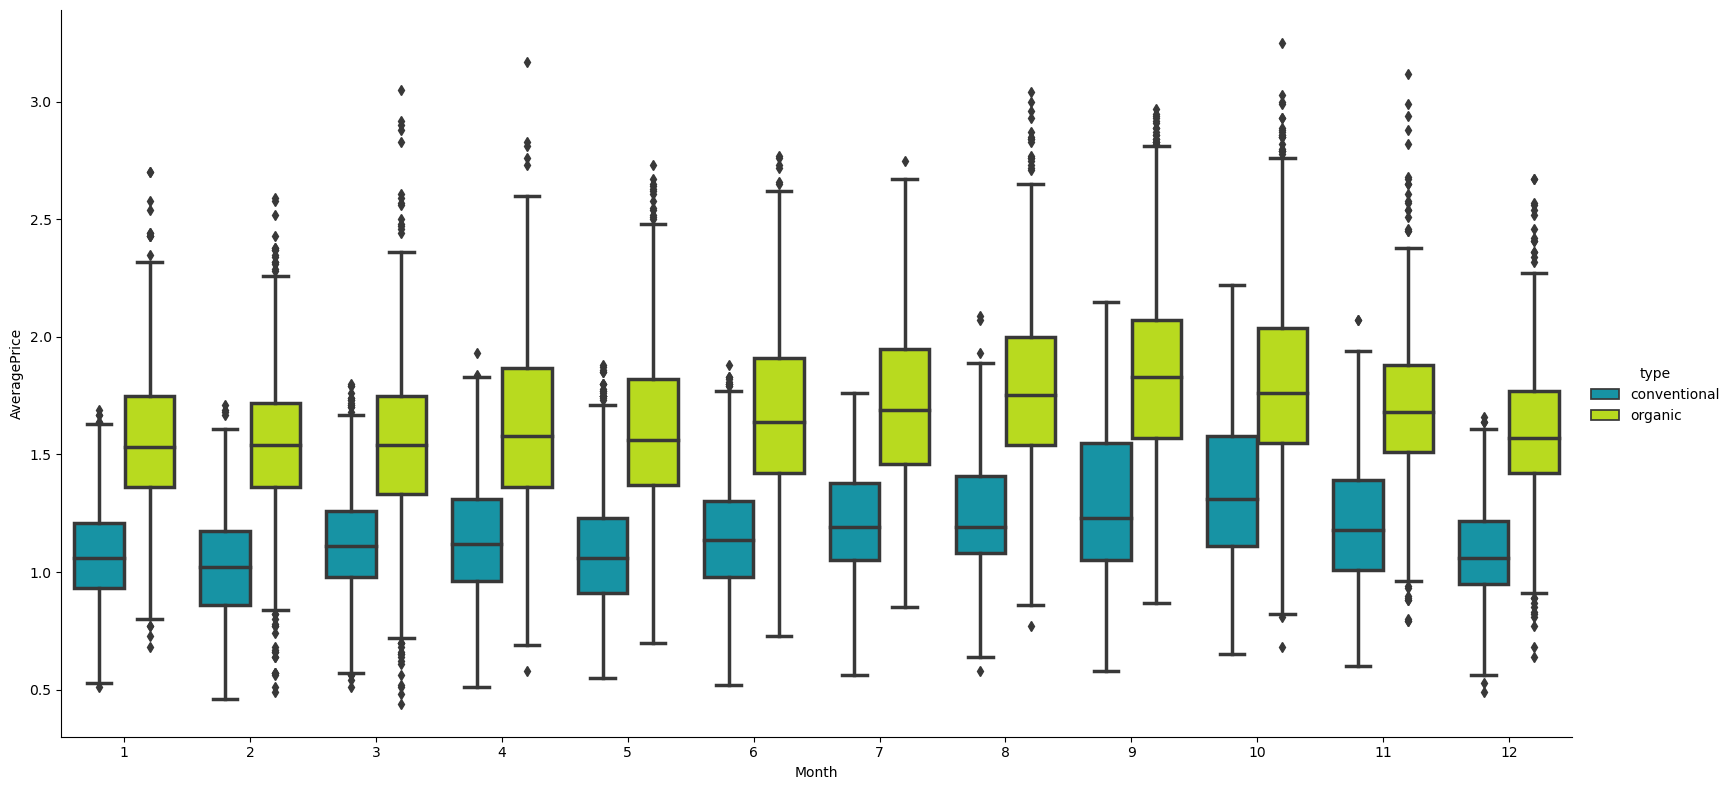

In [44]:
#Relation between month and Average PRice
sns.catplot(x="Month", y="AveragePrice", hue="type", 
            kind="box", data=data, height=8, linewidth=2.5, aspect=2,palette="nipy_spectral");

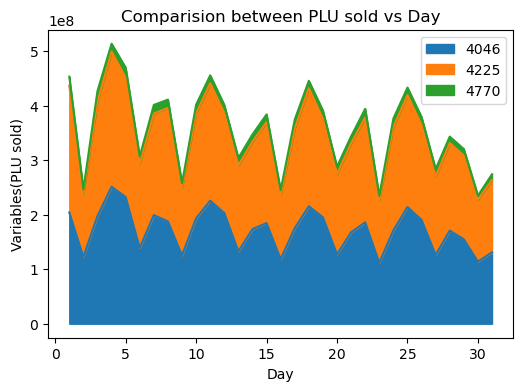

In [45]:
#Comparison between PLU sold vs day:
variables = data[['4046', '4225', '4770']].groupby(data.Day).sum()
variables.plot(kind='area', fontsize=10,figsize=(6,4))
plt.title("Comparision between PLU sold vs Day")
plt.xlabel("Day")
plt.ylabel("Variables(PLU sold)")
plt.show()

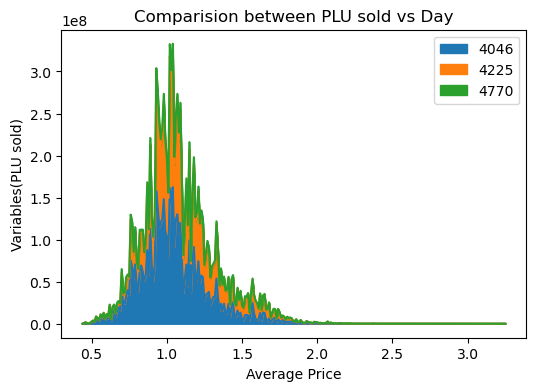

In [46]:
#Type of PLU sold and Average Price
variables = data[['4046', '4225', '4770']].groupby(data.AveragePrice).sum()
variables.plot(kind='area', fontsize=10,figsize=(6,4))
plt.title("Comparision between PLU sold vs Day")
plt.xlabel("Average Price")
plt.ylabel("Variables(PLU sold)")
plt.show()


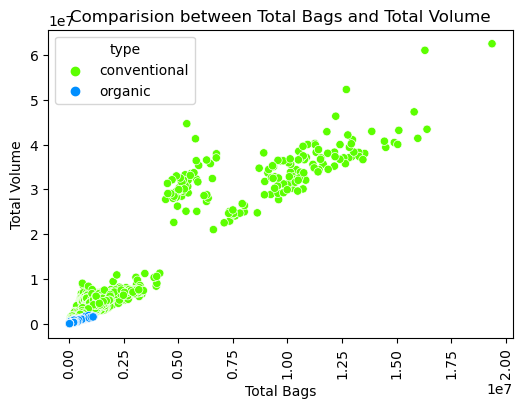

In [47]:
#Comparison between the Total Bags and Total Volume:
plt.figure(figsize=(6,4))
plt.title("Comparision between Total Bags and Total Volume")
sns.scatterplot(x='Total Bags',y='Total Volume',hue="type",data=data,palette="gist_rainbow")
plt.xticks(rotation=90)
plt.show()

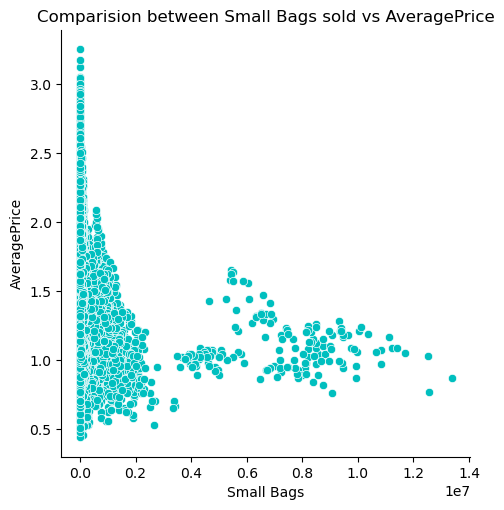

In [48]:
# Comparision between Small Bags sold vs AveragePrice:
sns.relplot(data['Small Bags'],data['AveragePrice'],color="c");
plt.title("Comparision between Small Bags sold vs AveragePrice")
plt.xlabel("Small Bags")
plt.ylabel("AveragePrice")
plt.show()

# CHECKING FOR OUTLIERS

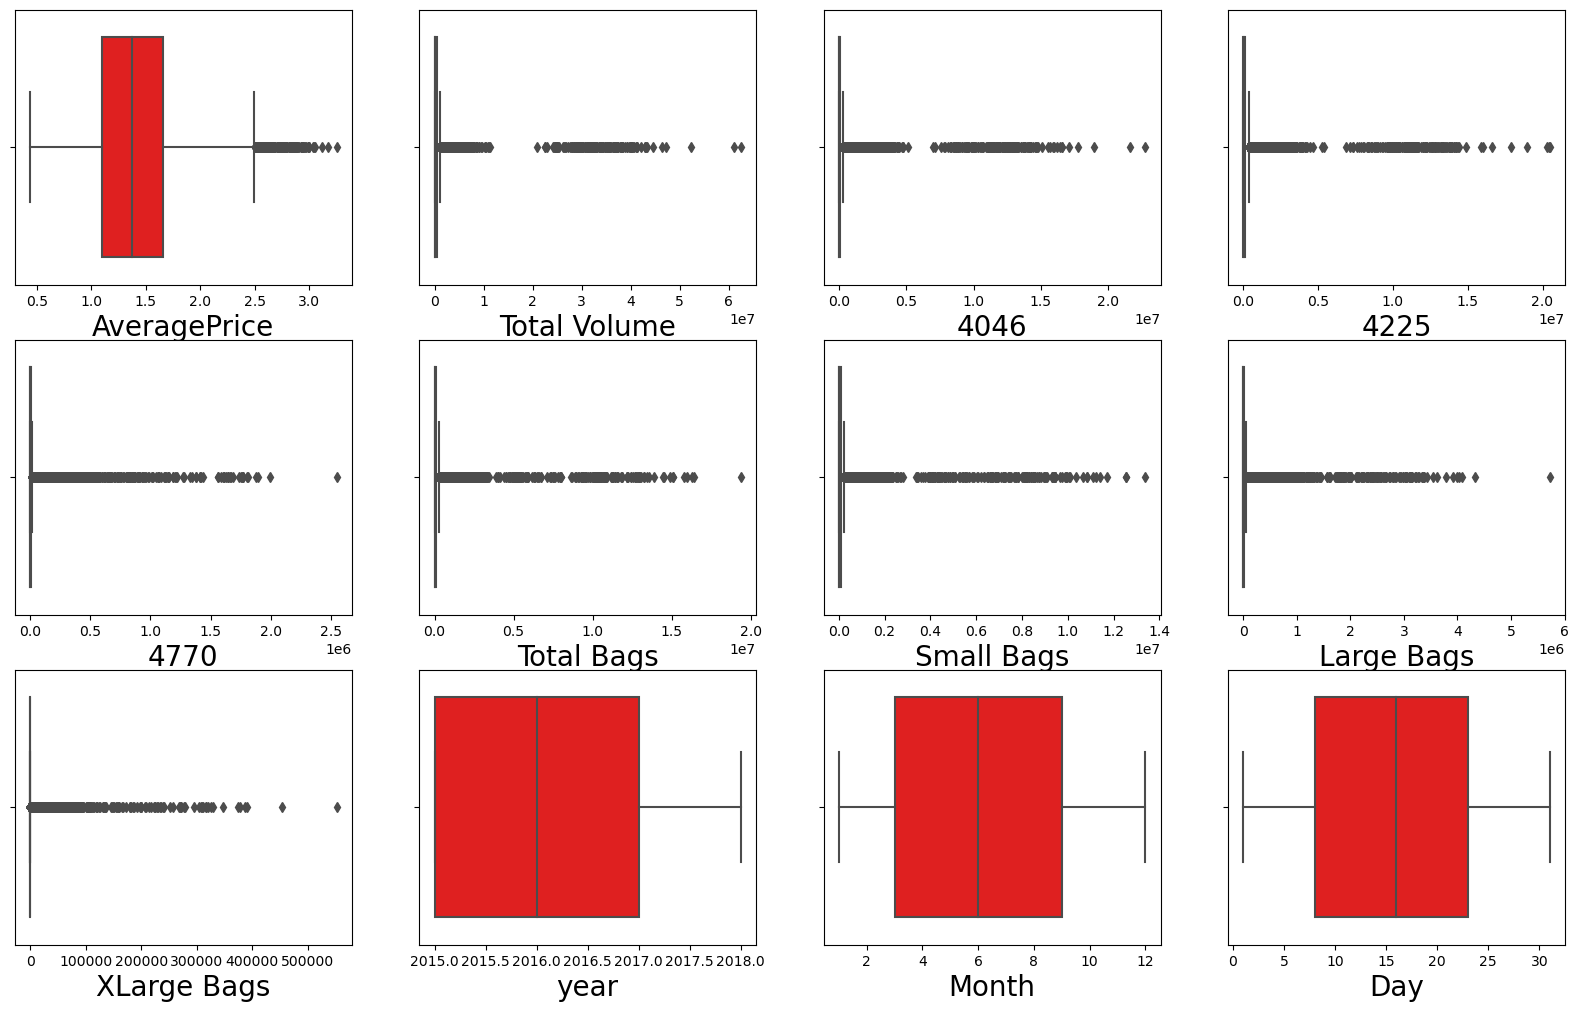

In [49]:
numerical_col=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year','Month', 'Day']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(data[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [50]:
#Zscore method
# Features containing outliers
feature_cols = data[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(feature_cols))

z

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0          0.227716  0.230816  0.199902  0.212091    0.234170    0.232647   
1          0.230427  0.231103  0.208054  0.211997    0.233350    0.231568   
2          0.212085  0.231007  0.154478  0.211325    0.234730    0.233399   
3          0.223444  0.230741  0.185350  0.211864    0.237096    0.236568   
4          0.231538  0.230891  0.208719  0.211834    0.236718    0.236154   
...             ...       ...       ...       ...         ...         ...   
18244      0.241373  0.230017  0.243857  0.212540    0.229301    0.226665   
18245      0.242296  0.230693  0.242277  0.212540    0.233594    0.232196   
18246      0.242331  0.230693  0.243090  0.205766    0.233463    0.231644   
18247      0.241625  0.230428  0.242651  0.205774    0.231866    0.229543   
18248      0.241253  0.229347  0.243170  0.210450    0.230807    0.228111   

       Large Bags  XLarge Bags  
0        0.222352      0.17558  
1        0.222335      0.17558  
2        0.222311      0.17558  
3        0.222186      0.17558  
4        0.221924      0.17558  
...           ...          ...  
18244    0.220964      0.17558  
18245    0.221403      0.17558  
18246    0.222561      0.17558  
18247    0.222529      0.17558  
18248    0.222628      0.17558  

[18249 rows x 8 columns]

In [51]:
# Creating new dataframe by removing zscore
new_df = data[(z<3).all(axis=1)] 
new_df

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags          type  year  \
0         8603.62       93.25          0.0  conventional  2015   
1         9408.07       97.49          0.0  conventional  2015   
2         8042.21      103.14          0.0  conventional  2015   
3         5677.40      133.76          0.0  conventional  2015   
4         5986.26      197.69          0.0  conventional  2015   
...           ...         ...          ...           ...   ...   
18244    13066.82      431.85          0.0       organic  2018   
18245     8940.04      324.80          0.0       organic  2018   
18246     9351.80       42.31          0.0       organic  2018   
18247    10919.54       50.00          0.0       organic  2018   
18248    11988.14       26.01          0.0       organic  2018   

                 region  Month  Day  
0                Albany     12   27  
1                Albany     12   20  
2                Albany     12   13  
3                Albany     12    6  
4                Albany     11   29  
...                 ...    ...  ...  
18244  WestTexNewMexico      2    4  
18245  WestTexNewMexico      1   28  
18246  WestTexNewMexico      1   21  
18247  WestTexNewMexico      1   14  
18248  WestTexNewMexico      1    7  

[17782 rows x 14 columns]

In [52]:
data.shape

(18249, 14)

In [53]:
new_df.shape

(17782, 14)

In [54]:
# % of data loss 
(18249-17782)/18249*100

2.55904433119623

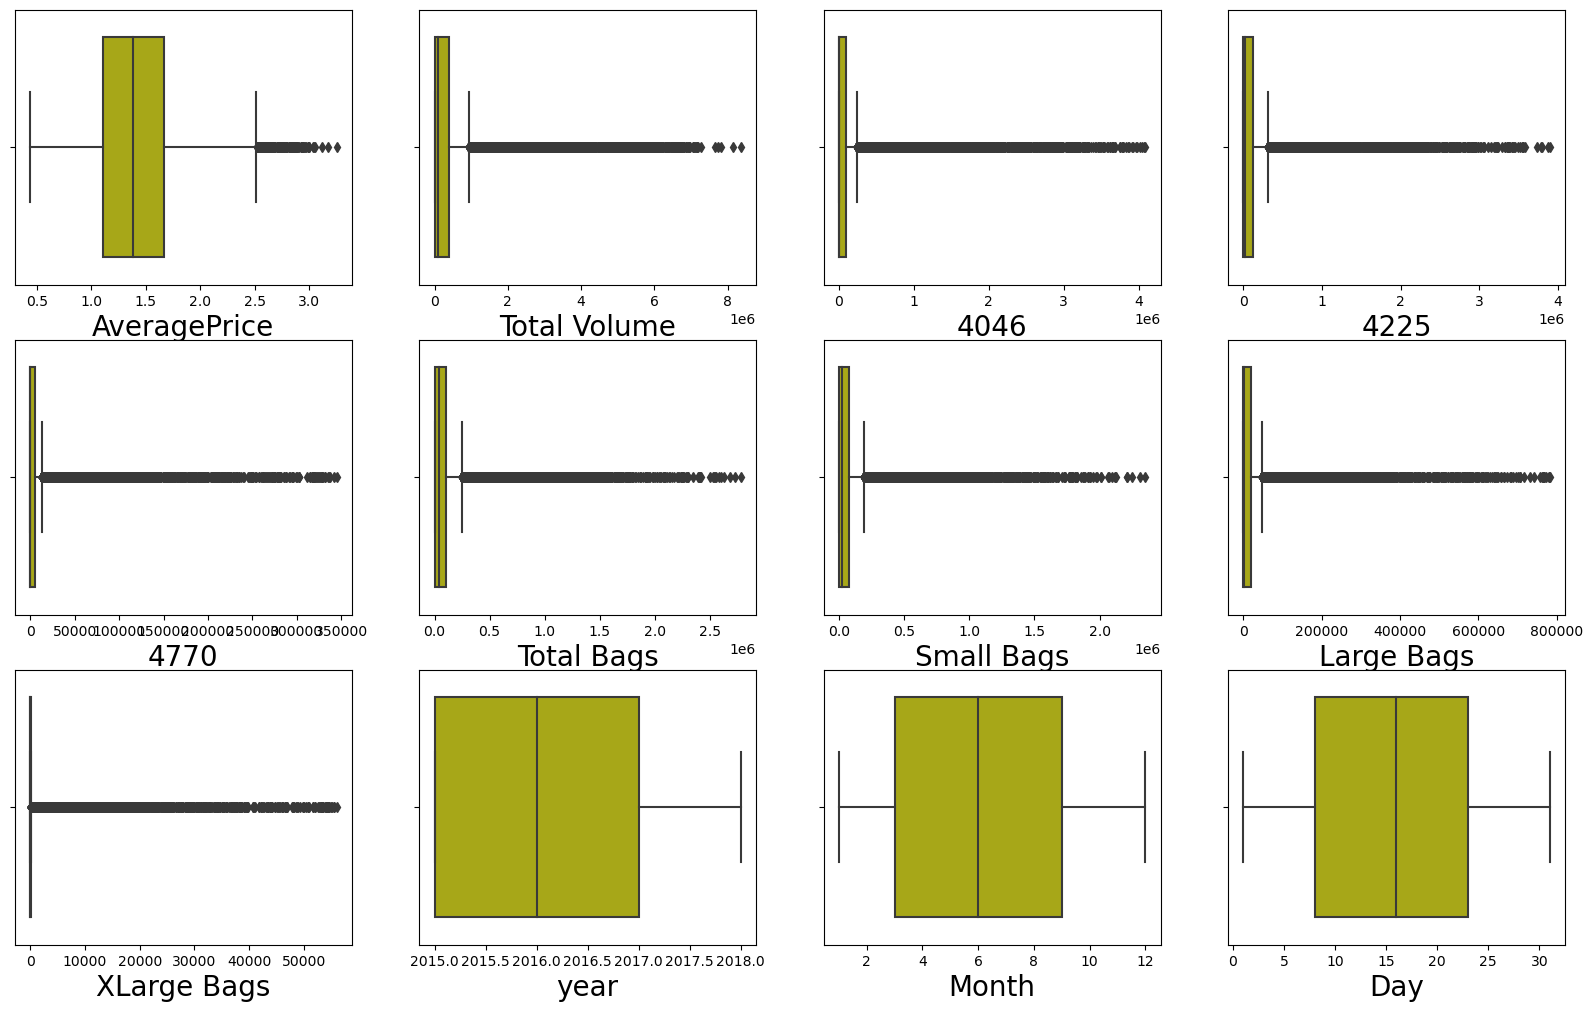

In [55]:
# again plotting to check the status of outlier amount:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(new_df[column],color='y')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Checking and removing Skewness:

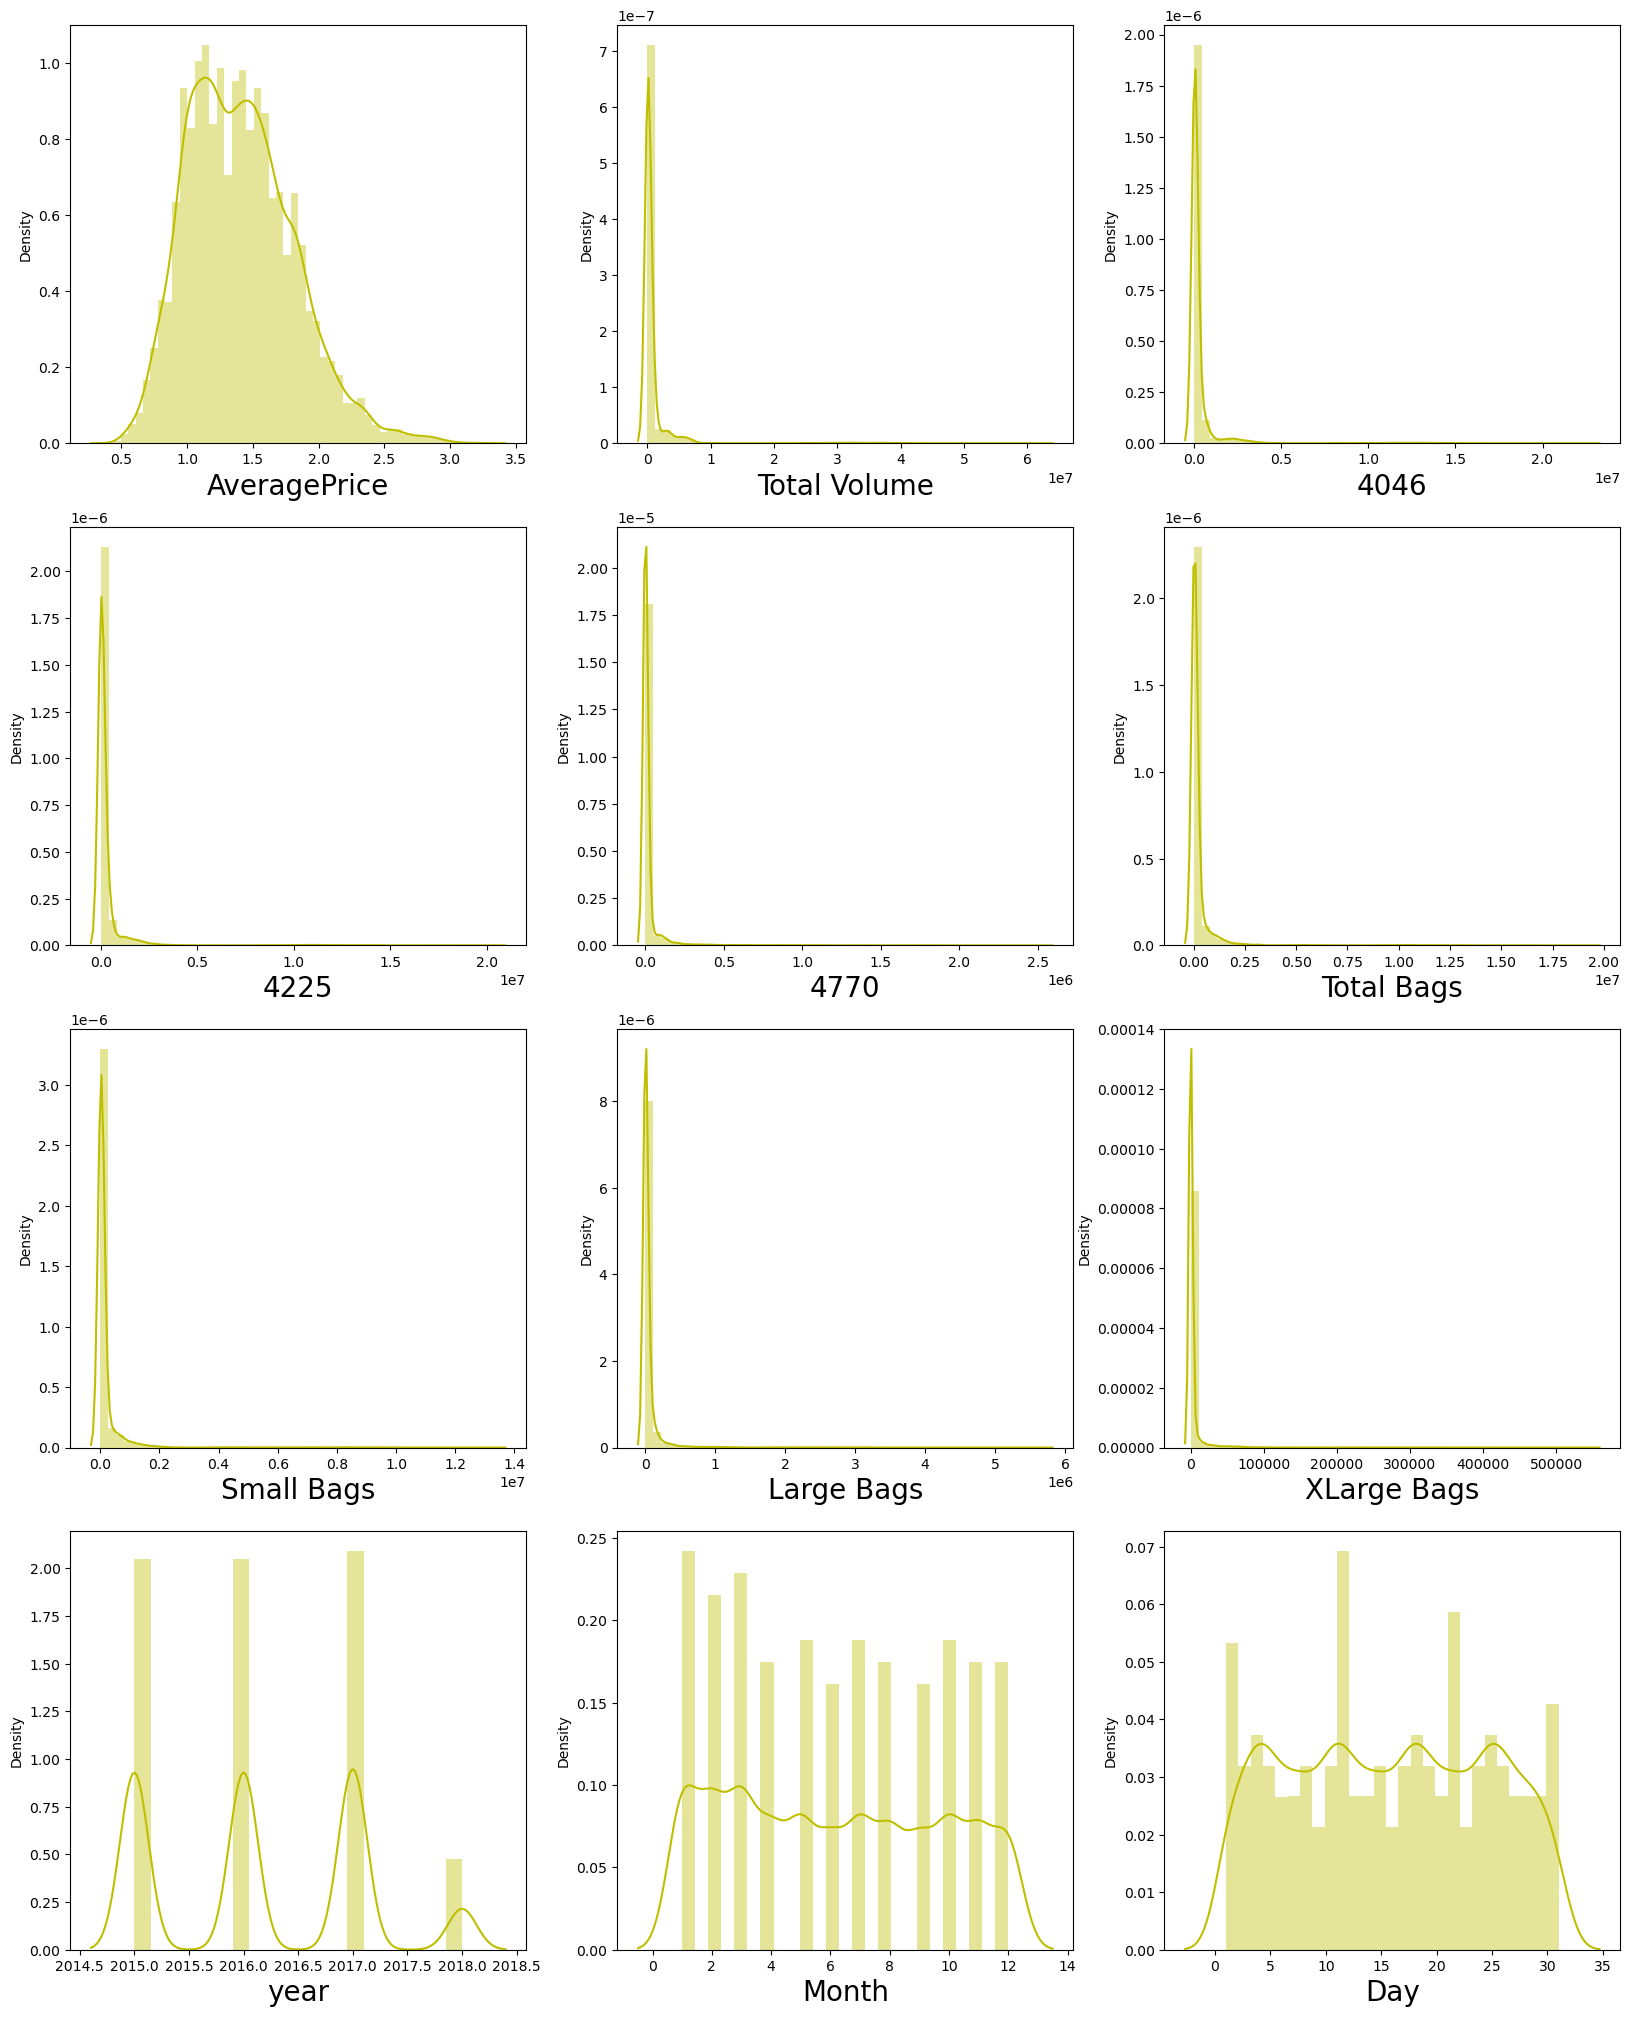

In [56]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=14:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(data[column],color='y')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [57]:
new_df.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

In [58]:
# Removing skewness using yeo-johnson method to get better prediction
features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
from sklearn.preprocessing import PowerTransformer
sk = PowerTransformer(method='yeo-johnson')
new_df[features] = sk.fit_transform(new_df[features].values)
new_df[features].head()

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2      0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3      0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   

   Large Bags  XLarge Bags  
0   -0.775214    -0.675702  
1   -0.765237    -0.675702  
2   -0.752534    -0.675702  
3   -0.693012    -0.675702  
4   -0.600755    -0.675702

In [59]:
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

Almost every skewness is removed but still Xlarge Bags have some skewness let us check with graph and try .remove it

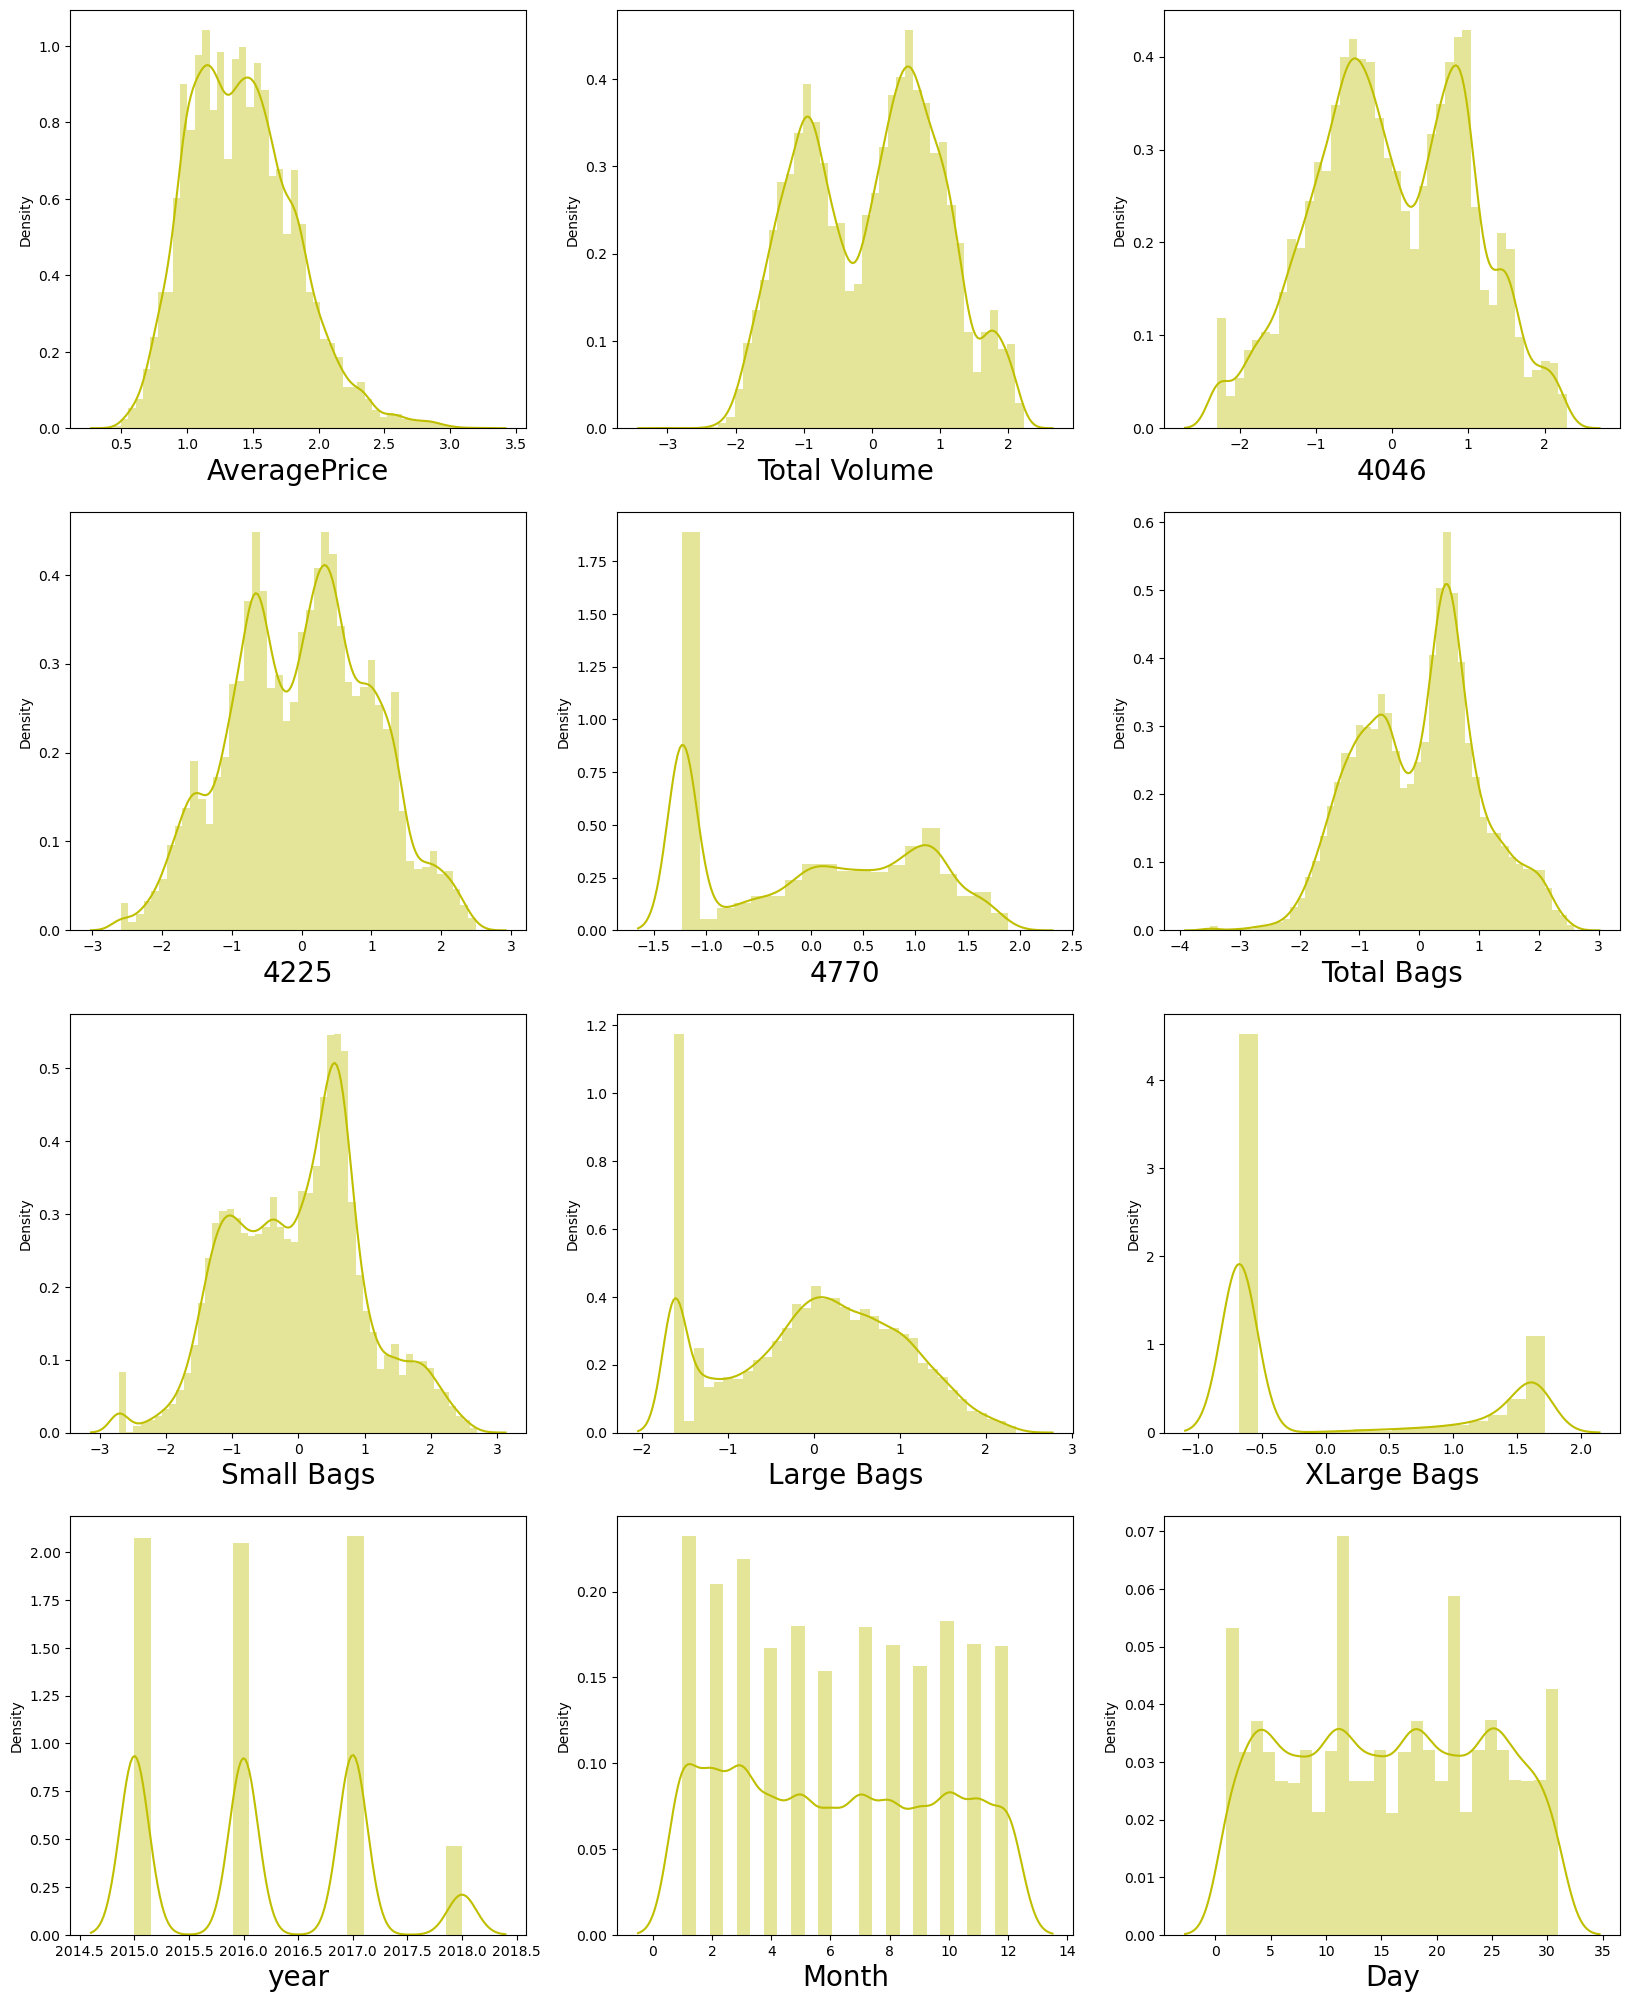

In [60]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=14:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(new_df[column],color='y')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [61]:
new_df["XLarge Bags"] = np.log1p(new_df["XLarge Bags"])
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

In [62]:
# let us try one more time for removal
f1=["XLarge Bags"]
new_df[f1] = sk.fit_transform(new_df[f1].values)
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.765164
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

# Encoding:

In [63]:
categorical_col = ["type","region"]
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)
new_df[categorical_col]

type  region
0         0       0
1         0       0
2         0       0
3         0       0
4         0       0
...     ...     ...
18244     1      53
18245     1      53
18246     1      53
18247     1      53
18248     1      53

[17782 rows x 2 columns]

# Correlation using HEAT map:

In [64]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.576829 -0.548618 -0.448579 -0.491320   
Total Volume     -0.576829      1.000000  0.889083  0.924160  0.818568   
4046             -0.548618      0.889083  1.000000  0.764679  0.736523   
4225             -0.448579      0.924160  0.764679  1.000000  0.796799   
4770             -0.491320      0.818568  0.736523  0.796799  1.000000   
Total Bags       -0.564616      0.939776  0.799354  0.818511  0.761641   
Small Bags       -0.493621      0.905098  0.778765  0.784901  0.754305   
Large Bags       -0.477879      0.681427  0.601899  0.614878  0.548457   
XLarge Bags      -0.393528      0.627310  0.573589  0.580290  0.615107   
type              0.608447     -0.800828 -0.725826 -0.747722 -0.780988   
year              0.099910      0.076584 -0.002396 -0.004533 -0.051657   
region            0.010428      0.065709  0.159390  0.032273  0.037805   
Month             0.157900     -0.026332 -0.025919 -0.024708 -0.017377   
Day               0.024742     -0.006248 -0.004558 -0.005919  0.001383   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.564616   -0.493621   -0.477879    -0.393528  0.608447   
Total Volume    0.939776    0.905098    0.681427     0.627310 -0.800828   
4046            0.799354    0.778765    0.601899     0.573589 -0.725826   
4225            0.818511    0.784901    0.614878     0.580290 -0.747722   
4770            0.761641    0.754305    0.548457     0.615107 -0.780988   
Total Bags      1.000000    0.949901    0.729652     0.609370 -0.725686   
Small Bags      0.949901    1.000000    0.566307     0.597809 -0.720466   
Large Bags      0.729652    0.566307    1.000000     0.449473 -0.500026   
XLarge Bags     0.609370    0.597809    0.449473     1.000000 -0.673864   
type           -0.725686   -0.720466   -0.500026    -0.673864  1.000000   
year            0.210924    0.185955    0.190295     0.153607  0.007399   
region          0.065996    0.051985    0.086573    -0.015786  0.021970   
Month          -0.014571   -0.010260   -0.016942     0.022063 -0.005044   
Day            -0.003703   -0.000535   -0.000876     0.011528 -0.002469   

                  year    region     Month       Day  
AveragePrice  0.099910  0.010428  0.157900  0.024742  
Total Volume  0.076584  0.065709 -0.026332 -0.006248  
4046         -0.002396  0.159390 -0.025919 -0.004558  
4225         -0.004533  0.032273 -0.024708 -0.005919  
4770         -0.051657  0.037805 -0.017377  0.001383  
Total Bags    0.210924  0.065996 -0.014571 -0.003703  
Small Bags    0.185955  0.051985 -0.010260 -0.000535  
Large Bags    0.190295  0.086573 -0.016942 -0.000876  
XLarge Bags   0.153607 -0.015786  0.022063  0.011528  
type          0.007399  0.021970 -0.005044 -0.002469  
year          1.000000 -0.003610 -0.173166  0.004044  
region       -0.003610  1.000000  0.002175  0.000751  
Month        -0.173166  0.002175  1.000000  0.010456  
Day           0.004044  0.000751  0.010456  1.000000

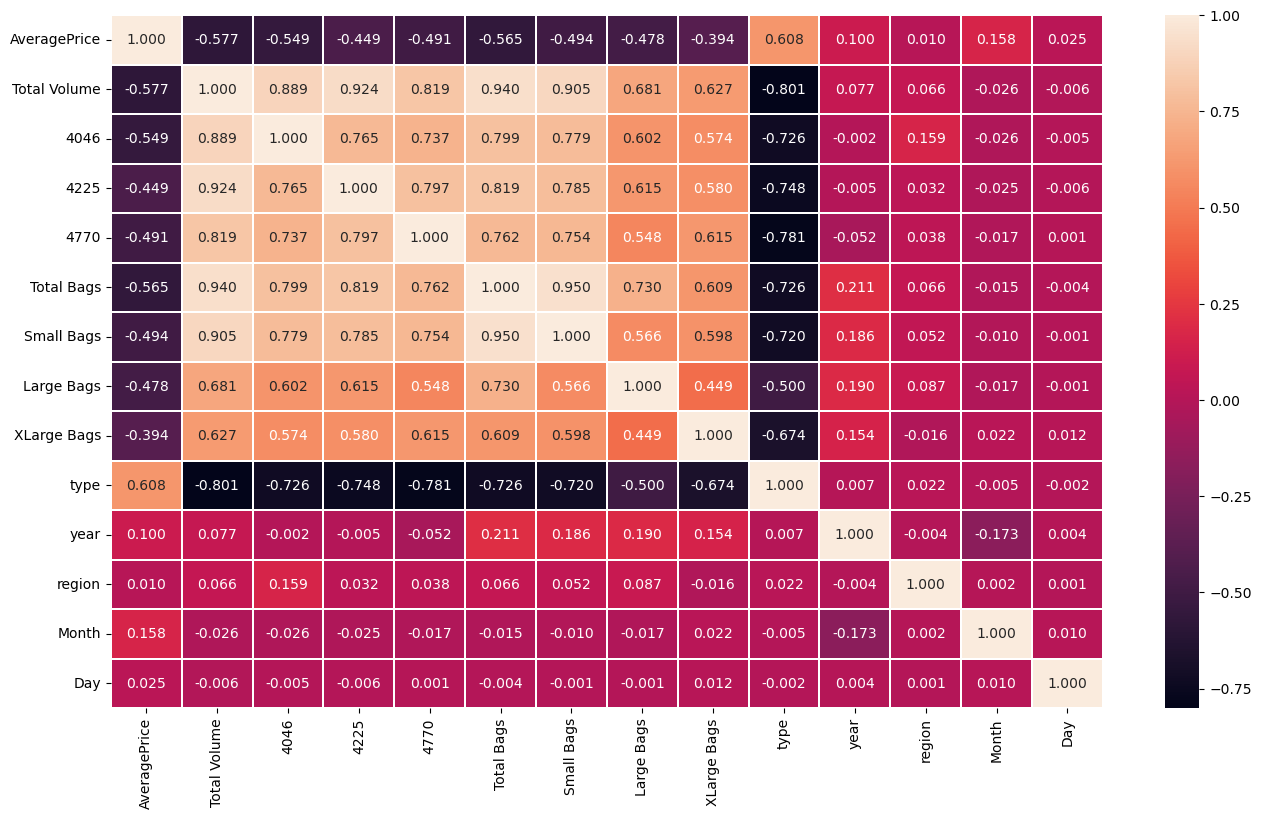

In [65]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(new_df.corr(),linewidths=.1,fmt='0.3f', annot = True)
plt.yticks(rotation=0)
plt.show()

In [66]:
cor['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
type            0.608447
Month           0.157900
year            0.099910
Day             0.024742
region          0.010428
XLarge Bags    -0.393528
4225           -0.448579
Large Bags     -0.477879
4770           -0.491320
Small Bags     -0.493621
4046           -0.548618
Total Bags     -0.564616
Total Volume   -0.576829
Name: AveragePrice, dtype: float64

# Visualizing the correlation between label and features using bar plot

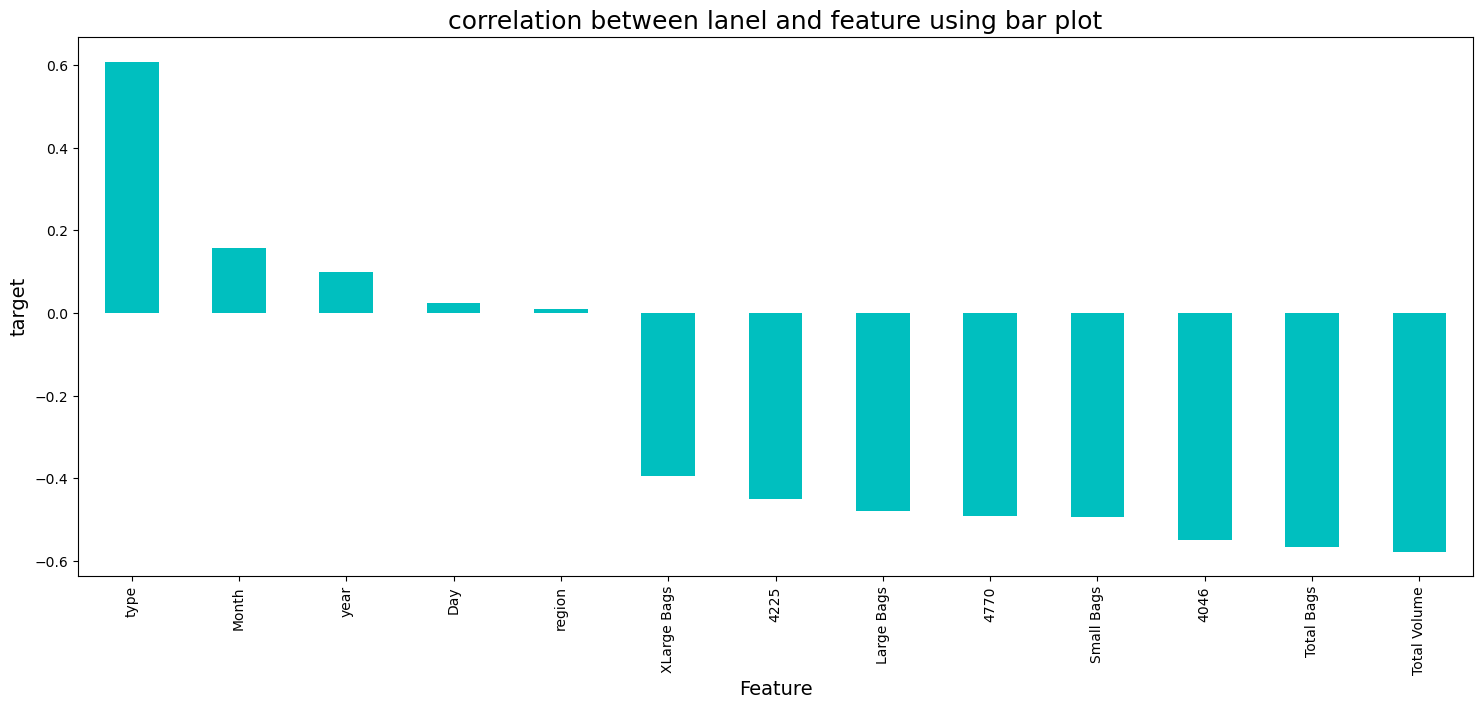

In [67]:
plt.figure(figsize=(18,7))
new_df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

In [68]:
new_df.head()

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          1.33     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   
1          1.35     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   
2          0.93      0.215503 -0.724508  0.656010  0.034215   -0.556204   
3          1.08      0.029840 -0.625017  0.475615 -0.110976   -0.702370   
4          1.28     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   

   Small Bags  Large Bags  XLarge Bags  type  year  region  Month  Day  
0   -0.337064   -0.775214    -0.689355     0  2015       0     12   27  
1   -0.301038   -0.765237    -0.689355     0  2015       0     12   20  
2   -0.364044   -0.752534    -0.689355     0  2015       0     12   13  
3   -0.500341   -0.693012    -0.689355     0  2015       0     12    6  
4   -0.479918   -0.600755    -0.689355     0  2015       0     11   29

In [69]:
# Saving the data for classification
class_df=new_df
class_df.head()

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          1.33     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   
1          1.35     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   
2          0.93      0.215503 -0.724508  0.656010  0.034215   -0.556204   
3          1.08      0.029840 -0.625017  0.475615 -0.110976   -0.702370   
4          1.28     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   

   Small Bags  Large Bags  XLarge Bags  type  year  region  Month  Day  
0   -0.337064   -0.775214    -0.689355     0  2015       0     12   27  
1   -0.301038   -0.765237    -0.689355     0  2015       0     12   20  
2   -0.364044   -0.752534    -0.689355     0  2015       0     12   13  
3   -0.500341   -0.693012    -0.689355     0  2015       0     12    6  
4   -0.479918   -0.600755    -0.689355     0  2015       0     11   29

In [70]:
# Dropping irrelevant columns
new_df.drop("region",axis=1, inplace=True)


In [71]:
new_df

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0              1.33     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   
1              1.35     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   
2              0.93      0.215503 -0.724508  0.656010  0.034215   -0.556204   
3              1.08      0.029840 -0.625017  0.475615 -0.110976   -0.702370   
4              1.28     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   
...             ...           ...       ...       ...       ...         ...   
18244          1.63     -0.668931 -0.454078 -0.922232 -1.224990   -0.331042   
18245          1.71     -0.762380 -0.610403 -0.665649 -1.224990   -0.499550   
18246          1.87     -0.766344 -0.610350 -0.774395  0.455355   -0.493424   
18247          1.93     -0.692595 -0.539211 -0.711605  0.455045   -0.424475   
18248          1.62     -0.658062 -0.351503 -0.787209  0.168008   -0.383676   

       Small Bags  Large Bags  XLarge Bags  type  year  Month  Day  
0       -0.337064   -0.775214    -0.689355     0  2015     12   27  
1       -0.301038   -0.765237    -0.689355     0  2015     12   20  
2       -0.364044   -0.752534    -0.689355     0  2015     12   13  
3       -0.500341   -0.693012    -0.689355     0  2015     12    6  
4       -0.479918   -0.600755    -0.689355     0  2015     11   29  
...           ...         ...          ...   ...   ...    ...  ...  
18244   -0.165765   -0.405895    -0.689355     1  2018      2    4  
18245   -0.321645   -0.478556    -0.689355     1  2018      1   28  
18246   -0.303466   -0.945246    -0.689355     1  2018      1   21  
18247   -0.240252   -0.910471    -0.689355     1  2018      1   14  
18248   -0.201685   -1.042930    -0.689355     1  2018      1    7  

[17782 rows x 13 columns]

# Separating the features and label variables into x and y:

In [72]:
x = new_df.drop("AveragePrice", axis=1)
y = new_df["AveragePrice"]

# Standard Scalarization Method

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0         -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1         -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2          0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3          0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4         -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   
...             ...       ...       ...       ...         ...         ...   
17777     -0.668931 -0.454078 -0.922232 -1.224990   -0.331042   -0.165765   
17778     -0.762380 -0.610403 -0.665649 -1.224990   -0.499550   -0.321645   
17779     -0.766344 -0.610350 -0.774395  0.455355   -0.493424   -0.303466   
17780     -0.692595 -0.539211 -0.711605  0.455045   -0.424475   -0.240252   
17781     -0.658062 -0.351503 -0.787209  0.168008   -0.383676   -0.201685   

       Large Bags  XLarge Bags      type      year     Month       Day  
0       -0.775214    -0.689355 -1.026443 -1.214908  1.641434  1.289235  
1       -0.765237    -0.689355 -1.026443 -1.214908  1.641434  0.491750  
2       -0.752534    -0.689355 -1.026443 -1.214908  1.641434 -0.305734  
3       -0.693012    -0.689355 -1.026443 -1.214908  1.641434 -1.103219  
4       -0.600755    -0.689355 -1.026443 -1.214908  1.358706  1.517088  
...           ...          ...       ...       ...       ...       ...  
17777   -0.405895    -0.689355  0.974238  1.979143 -1.185845 -1.331072  
17778   -0.478556    -0.689355  0.974238  1.979143 -1.468572  1.403161  
17779   -0.945246    -0.689355  0.974238  1.979143 -1.468572  0.605677  
17780   -0.910471    -0.689355  0.974238  1.979143 -1.468572 -0.191808  
17781   -1.042930    -0.689355  0.974238  1.979143 -1.468572 -0.989293  

[17782 rows x 12 columns]

# Checking VIF values for multicollinearity:

In [74]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values      Features
0    51.793329  Total Volume
1     6.807550          4046
2    11.152912          4225
3     3.949634          4770
4    34.444054    Total Bags
5    16.630034    Small Bags
6     3.462437    Large Bags
7     2.060420   XLarge Bags
8     3.737910          type
9     1.384969          year
10    1.054214         Month
11    1.000794           Day

Here we set threshold for 10, So here we have 4 Columns not come in our range lets remove the multicollinearity problem.

In [75]:
# Dropping the column Total Bags
x.drop(columns=["Total Bags",'Total Volume',],axis=1, inplace=True)

In [76]:
# Checking VIF again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values     Features
0    3.527570         4046
1    4.127913         4225
2    3.933975         4770
3    4.097441   Small Bags
4    1.864170   Large Bags
5    2.049376  XLarge Bags
6    3.502430         type
7    1.358053         year
8    1.051412        Month
9    1.000539          Day

In [77]:
#Lets use any other feature selection technique
from sklearn.feature_selection import SelectKBest,f_classif

In [78]:
select_feature=SelectKBest(score_func=f_classif,k=10)
fit=select_feature.fit(x,y)
score=pd.DataFrame(fit.scores_)
column=pd.DataFrame(x.columns)

best_feature=pd.concat([column,score],axis=1)
best_feature.columns=['Feature','Score']
print(best_feature.nlargest(11,'Score'))

       Feature      Score
6         type  49.966168
0         4046  36.480181
2         4770  27.651101
3   Small Bags  25.039951
4   Large Bags  23.354747
1         4225  21.772853
5  XLarge Bags  15.836752
7         year   3.163539
8        Month   2.850599
9          Day   1.249095


# Building a model:

In [79]:
#Lets create with random forest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [80]:
# finding Best Random state Linear Regression
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.5411969943371744 on Random State 438


In [81]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=438)

In [82]:
regressors = {
    
    'Linear Regression' : LinearRegression(),
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]
results

MAE    MSE      RMSE  R2-score
Linear Regression  0.213  0.074  0.272471     0.541

In [83]:
#Lets build with Decision Tree
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    dt = DecisionTreeRegressor()
    dt.fit(X_train, y_train)
    pred = dt.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.7599494493804342 on Random State 84


In [84]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=84)

In [85]:
regressors = {
    
    'DecisionTreeRegressor' : DecisionTreeRegressor(),
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]
results

MAE    MSE     RMSE  R2-score
DecisionTreeRegressor  0.129  0.039  0.19676      0.76

So, Here i am selecting the DecisionTreeRegressor . Lets move foreward to Cross Validation .

# Cross - Validation of the model

In [86]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred = lr.predict(X_test)
lss  = r2_score(y_test,y_pred)

In [87]:
# from sklearn.model_selection import cross_val_score
for j in range(2,10):
    isscore = cross_val_score(dt,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 2
Cross validation score is:- -190.11671852920733
accuracy_score is:- 50.099764138518196


At cv:- 3
Cross validation score is:- -46.45391780867128
accuracy_score is:- 50.099764138518196


At cv:- 4
Cross validation score is:- -40.619681837543425
accuracy_score is:- 50.099764138518196


At cv:- 5
Cross validation score is:- -33.768535232709645
accuracy_score is:- 50.099764138518196


At cv:- 6
Cross validation score is:- -32.79909048812225
accuracy_score is:- 50.099764138518196


At cv:- 7
Cross validation score is:- -12.047836301660256
accuracy_score is:- 50.099764138518196


At cv:- 8
Cross validation score is:- -26.46799123051474
accuracy_score is:- 50.099764138518196


At cv:- 9
Cross validation score is:- -14.49447838559913
accuracy_score is:- 50.099764138518196




Our Model is Overfitted . Lets do hyperparameter tuning to get better accuracy.

# Hyperparameter Tuning 

In [88]:
#We are tuning four important hyperparameter right now, we are passing the different values for both paramters.

from sklearn.model_selection import GridSearchCV
grid_param={
    
    'max_depth': range(10,15),# The Maximum depth of the tree
    'min_samples_leaf':range(2,6),#The maximum number of samples required to be at a leaf node
    'min_samples_split':range(3,8),#The minimum numbers of sample required to split an internal node
    'max_leaf_nodes':range(5,10)}#Best nodes are defined as them unlimited number of leaf nodes

#criterian

In [89]:
grid_search=GridSearchCV(estimator=dt,
                         param_grid=grid_param,
                         cv=5,
                        n_jobs=-1)#use all the cores in your system for performance improvement .

In [90]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [91]:
best_parameter=grid_search.best_params_
print(best_parameter)

{'max_depth': 10, 'max_leaf_nodes': 9, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [92]:
#Initiate DecisionTreeClassifier with new parameter and train.

cnn=DecisionTreeRegressor(max_depth=11,max_leaf_nodes=9,min_samples_split= 7,min_samples_leaf=2)

In [93]:
#Train the model
cnn.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=11, max_leaf_nodes=9, min_samples_leaf=2,
                      min_samples_split=7)

In [94]:
cnn.score(X_test,y_test)

0.5004103693234454

In [95]:
pred = model.predict(X_test)

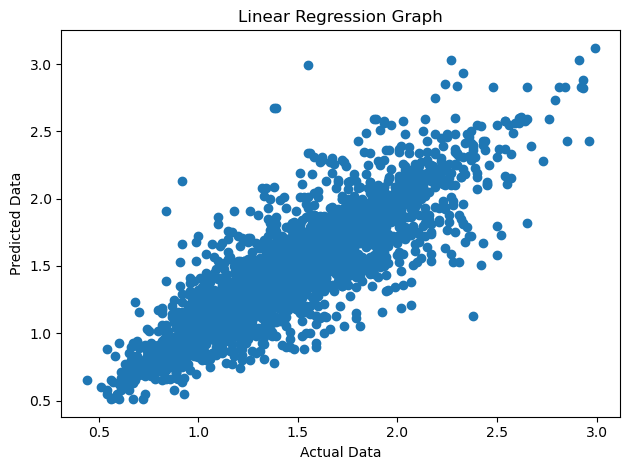

In [96]:
plt.scatter(y_test,pred)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.title('Linear Regression Graph')
plt.tight_layout()

# Saving the model

In [97]:
# Saving the model using .pkl
import joblib
joblib.dump(cnn,"Pranathi Decision Tree Regression 4.0")

['Pranathi Decision Tree Regression 4.0']

# Predicting the saved model:

In [98]:
# Let's load the saved model and get the prediction

model=joblib.load("Pranathi Decision Tree Regression 4.0")

#Prediction
prediction = model.predict(X_test)
prediction

array([1.49324236, 1.49324236, 1.49324236, ..., 1.18118194, 1.14237293,
       1.66791372])

In [99]:
a=np.array(y_test)
result=pd.DataFrame({'Original':a,'Predicted':prediction},index=range(len(a)))
result

Original  Predicted
0         2.16   1.493242
1         1.36   1.493242
2         1.89   1.493242
3         1.68   1.415755
4         1.20   1.142373
...        ...        ...
3552      1.04   1.142373
3553      1.42   1.415755
3554      1.34   1.181182
3555      0.92   1.142373
3556      1.88   1.667914

[3557 rows x 2 columns]

# Classification Problem- Finding the Region from these data

In [103]:
data= pd.read_csv("https://raw.githubusercontent.com/AvichalV/Avocado_Project/main/avocado.csv")
data.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [104]:
data['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [105]:
data["region"].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [106]:
data.shape

(18249, 14)

In [110]:
# Changing date column from object type to Date Type
data['Date']=pd.to_datetime(data['Date'])

In [111]:
#Checking the datatypes again
data.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [112]:
# Now Seperate date and month
data["Month"] = data["Date"].dt.month
data["Day"] = data["Date"].dt.day
data.drop("Date",axis=1,inplace=True)

In [113]:
#Lets delete Unnecessary Column ("Unnamed: 0")
data.drop(columns="Unnamed: 0",inplace=True)
data.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  year  region  Month  Day  
0     8603.62       93.25          0.0  conventional  2015  Albany     12   27  
1     9408.07       97.49          0.0  conventional  2015  Albany     12   20  
2     8042.21      103.14          0.0  conventional  2015  Albany     12   13  
3     5677.40      133.76          0.0  conventional  2015  Albany     12    6  
4     5986.26      197.69          0.0  conventional  2015  Albany     11   29

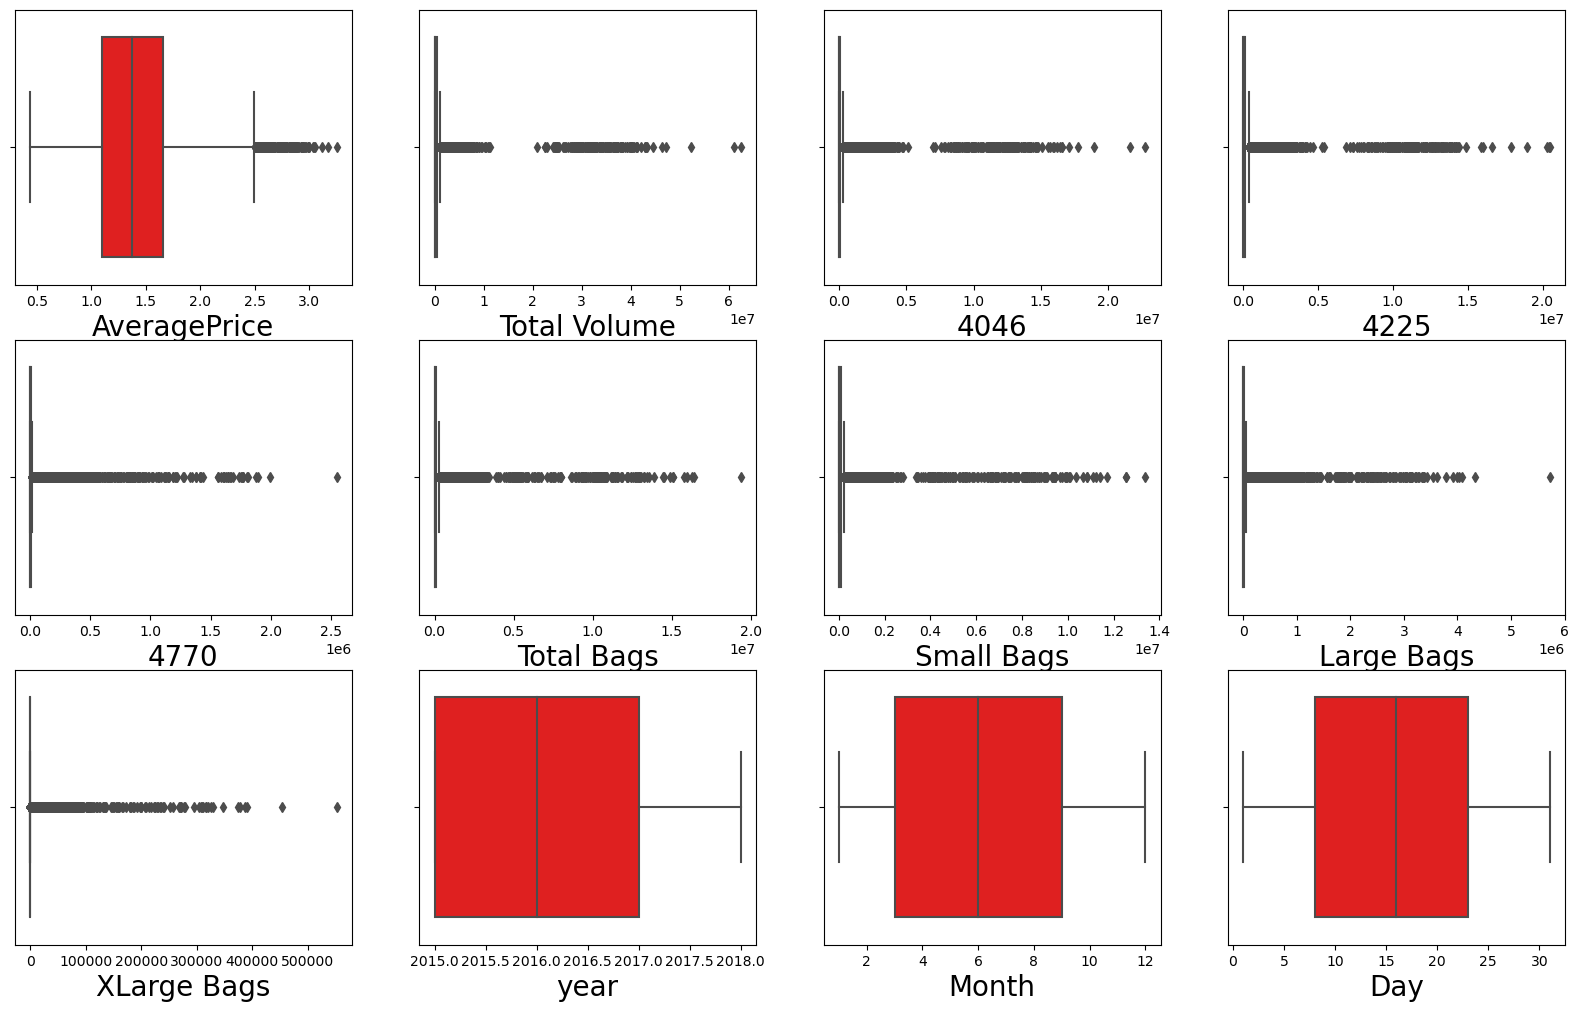

In [114]:
#Check for outliers
numerical_col=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year','Month', 'Day']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(data[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Zscore method

In [115]:
# Features containing outliers
feature_cols = data[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(feature_cols))

z

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0          0.227716  0.230816  0.199902  0.212091    0.234170    0.232647   
1          0.230427  0.231103  0.208054  0.211997    0.233350    0.231568   
2          0.212085  0.231007  0.154478  0.211325    0.234730    0.233399   
3          0.223444  0.230741  0.185350  0.211864    0.237096    0.236568   
4          0.231538  0.230891  0.208719  0.211834    0.236718    0.236154   
...             ...       ...       ...       ...         ...         ...   
18244      0.241373  0.230017  0.243857  0.212540    0.229301    0.226665   
18245      0.242296  0.230693  0.242277  0.212540    0.233594    0.232196   
18246      0.242331  0.230693  0.243090  0.205766    0.233463    0.231644   
18247      0.241625  0.230428  0.242651  0.205774    0.231866    0.229543   
18248      0.241253  0.229347  0.243170  0.210450    0.230807    0.228111   

       Large Bags  XLarge Bags  
0        0.222352      0.17558  
1        0.222335      0.17558  
2        0.222311      0.17558  
3        0.222186      0.17558  
4        0.221924      0.17558  
...           ...          ...  
18244    0.220964      0.17558  
18245    0.221403      0.17558  
18246    0.222561      0.17558  
18247    0.222529      0.17558  
18248    0.222628      0.17558  

[18249 rows x 8 columns]

In [116]:
# Creating new dataframe by removing zscore
new_df = data[(z<3).all(axis=1)] 
new_df

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags          type  year  \
0         8603.62       93.25          0.0  conventional  2015   
1         9408.07       97.49          0.0  conventional  2015   
2         8042.21      103.14          0.0  conventional  2015   
3         5677.40      133.76          0.0  conventional  2015   
4         5986.26      197.69          0.0  conventional  2015   
...           ...         ...          ...           ...   ...   
18244    13066.82      431.85          0.0       organic  2018   
18245     8940.04      324.80          0.0       organic  2018   
18246     9351.80       42.31          0.0       organic  2018   
18247    10919.54       50.00          0.0       organic  2018   
18248    11988.14       26.01          0.0       organic  2018   

                 region  Month  Day  
0                Albany     12   27  
1                Albany     12   20  
2                Albany     12   13  
3                Albany     12    6  
4                Albany     11   29  
...                 ...    ...  ...  
18244  WestTexNewMexico      2    4  
18245  WestTexNewMexico      1   28  
18246  WestTexNewMexico      1   21  
18247  WestTexNewMexico      1   14  
18248  WestTexNewMexico      1    7  

[17782 rows x 14 columns]

In [117]:
data.shape

(18249, 14)

In [118]:
new_df.shape

(17782, 14)

In [119]:
# % of data loss 
(18249-17782)/18249*100

2.55904433119623

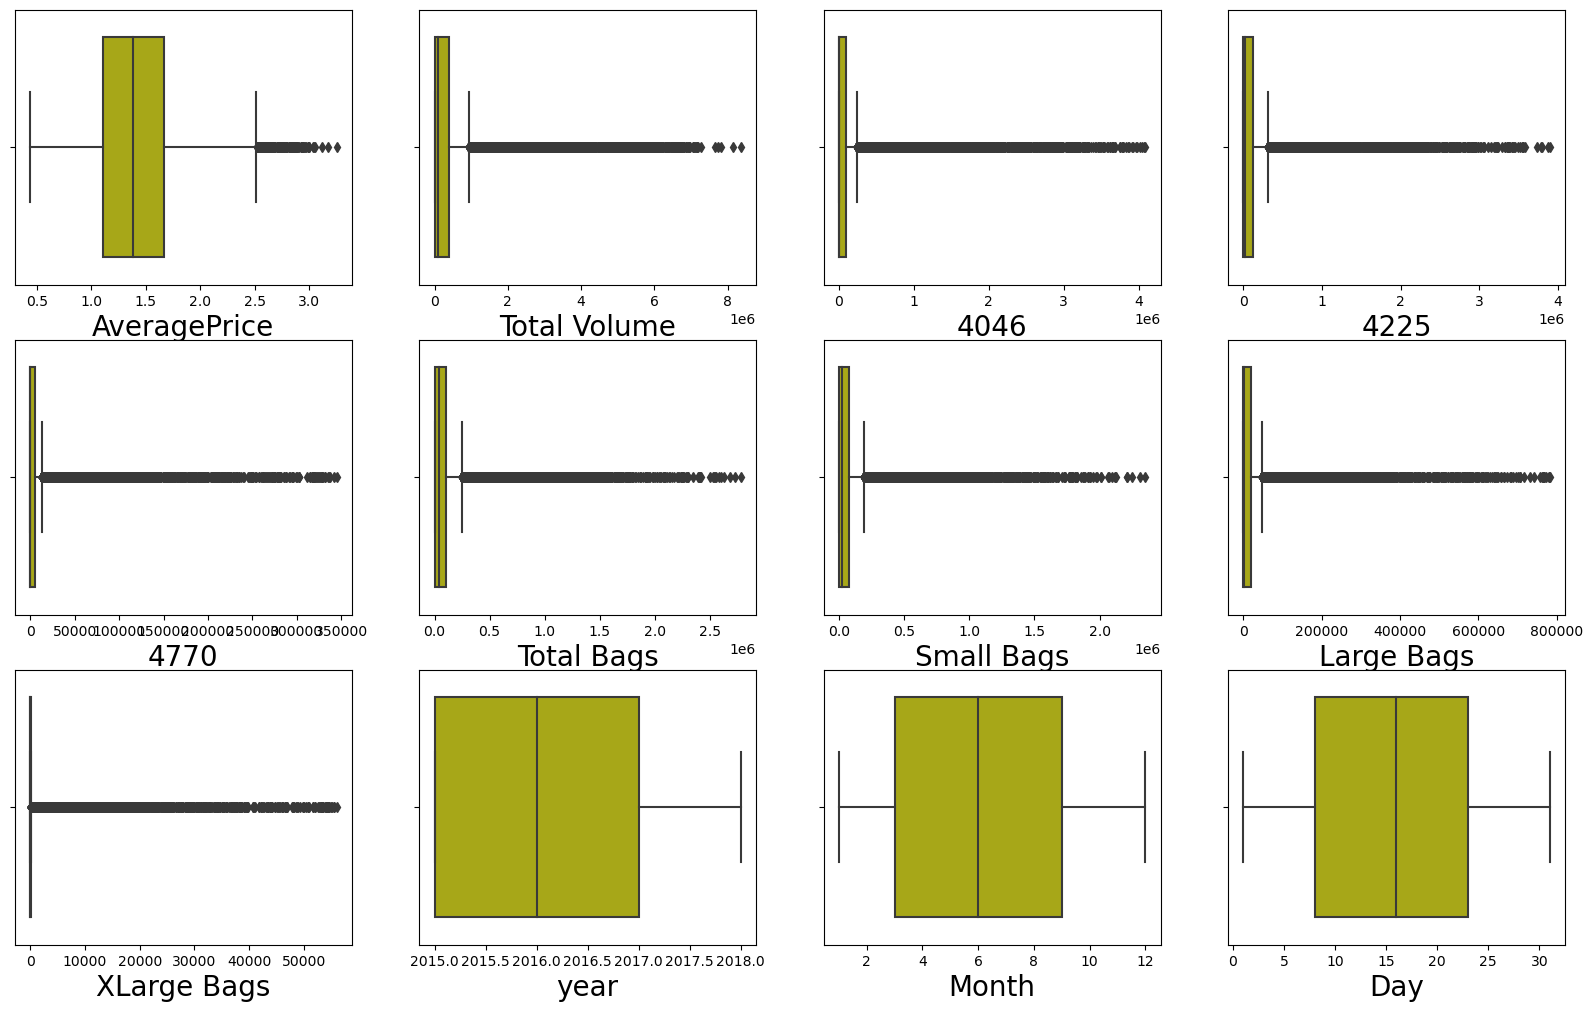

In [120]:
# again plotting to check the status of outlier amount:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(new_df[column],color='y')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Checking and removing Skewness:

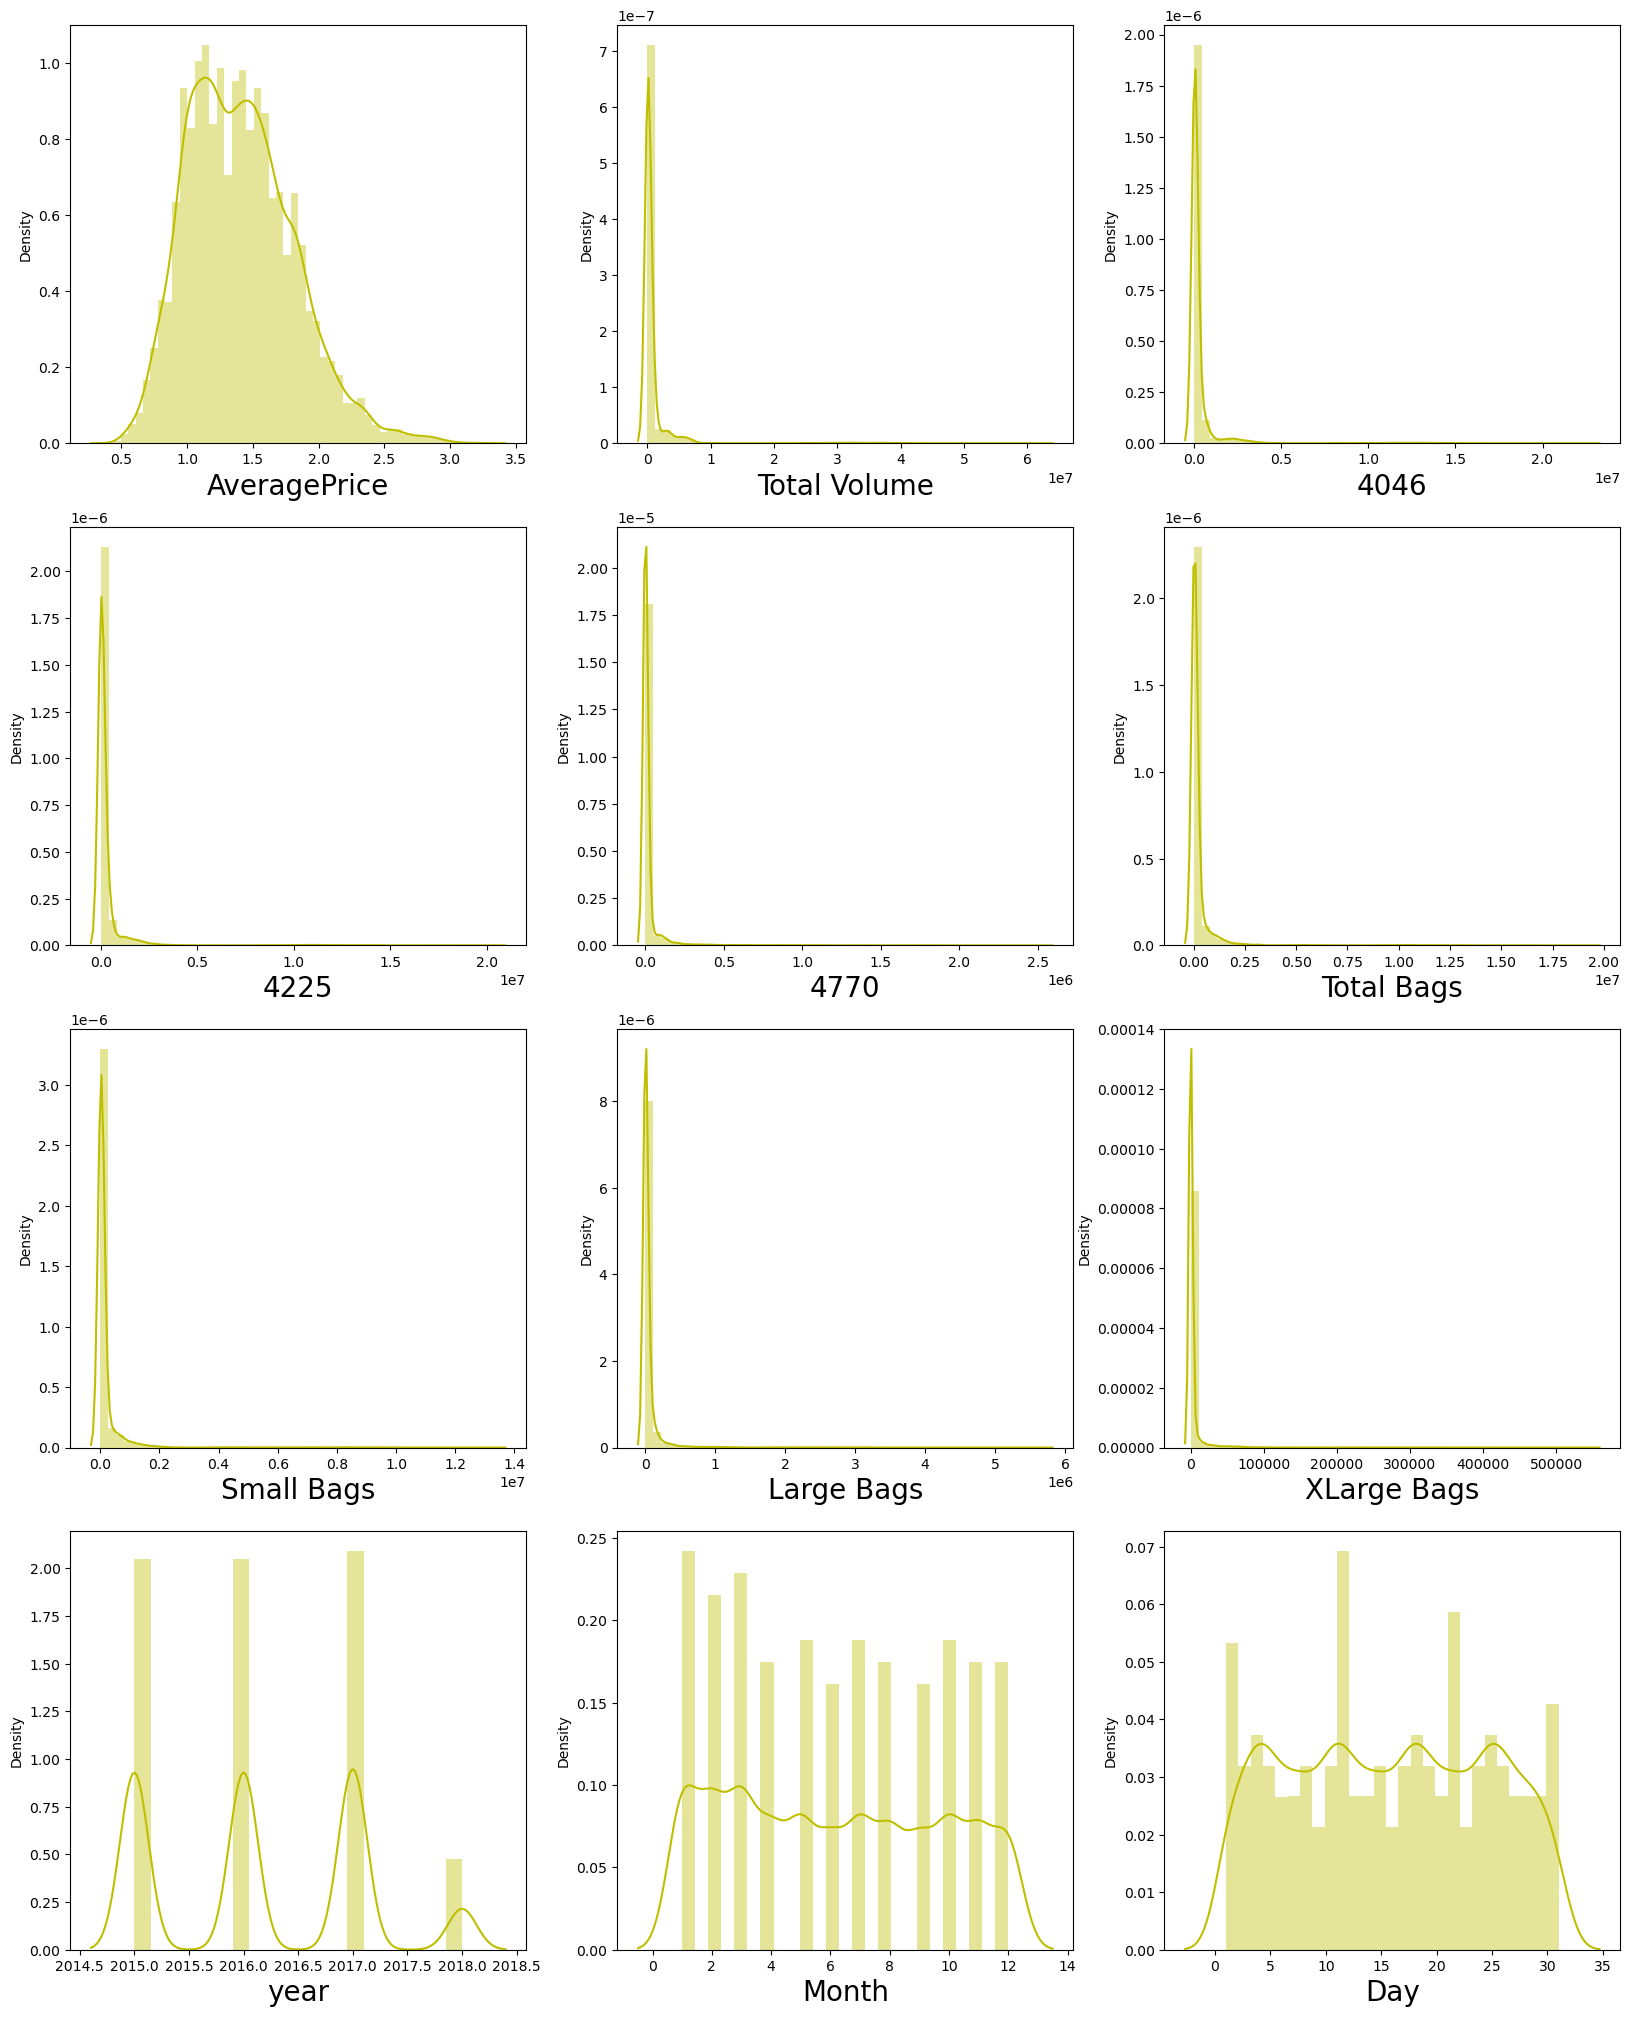

In [121]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=14:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(data[column],color='y')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [122]:
new_df.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

In [123]:
# Removing skewness using yeo-johnson method to get better prediction
features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
from sklearn.preprocessing import PowerTransformer
sk = PowerTransformer(method='yeo-johnson')
new_df[features] = sk.fit_transform(new_df[features].values)
new_df[features].head()

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2      0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3      0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   

   Large Bags  XLarge Bags  
0   -0.775214    -0.675702  
1   -0.765237    -0.675702  
2   -0.752534    -0.675702  
3   -0.693012    -0.675702  
4   -0.600755    -0.675702

In [124]:
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

Almost every skewness is removed but still Xlarge Bags have some skewness let us check with graph and try .remove it

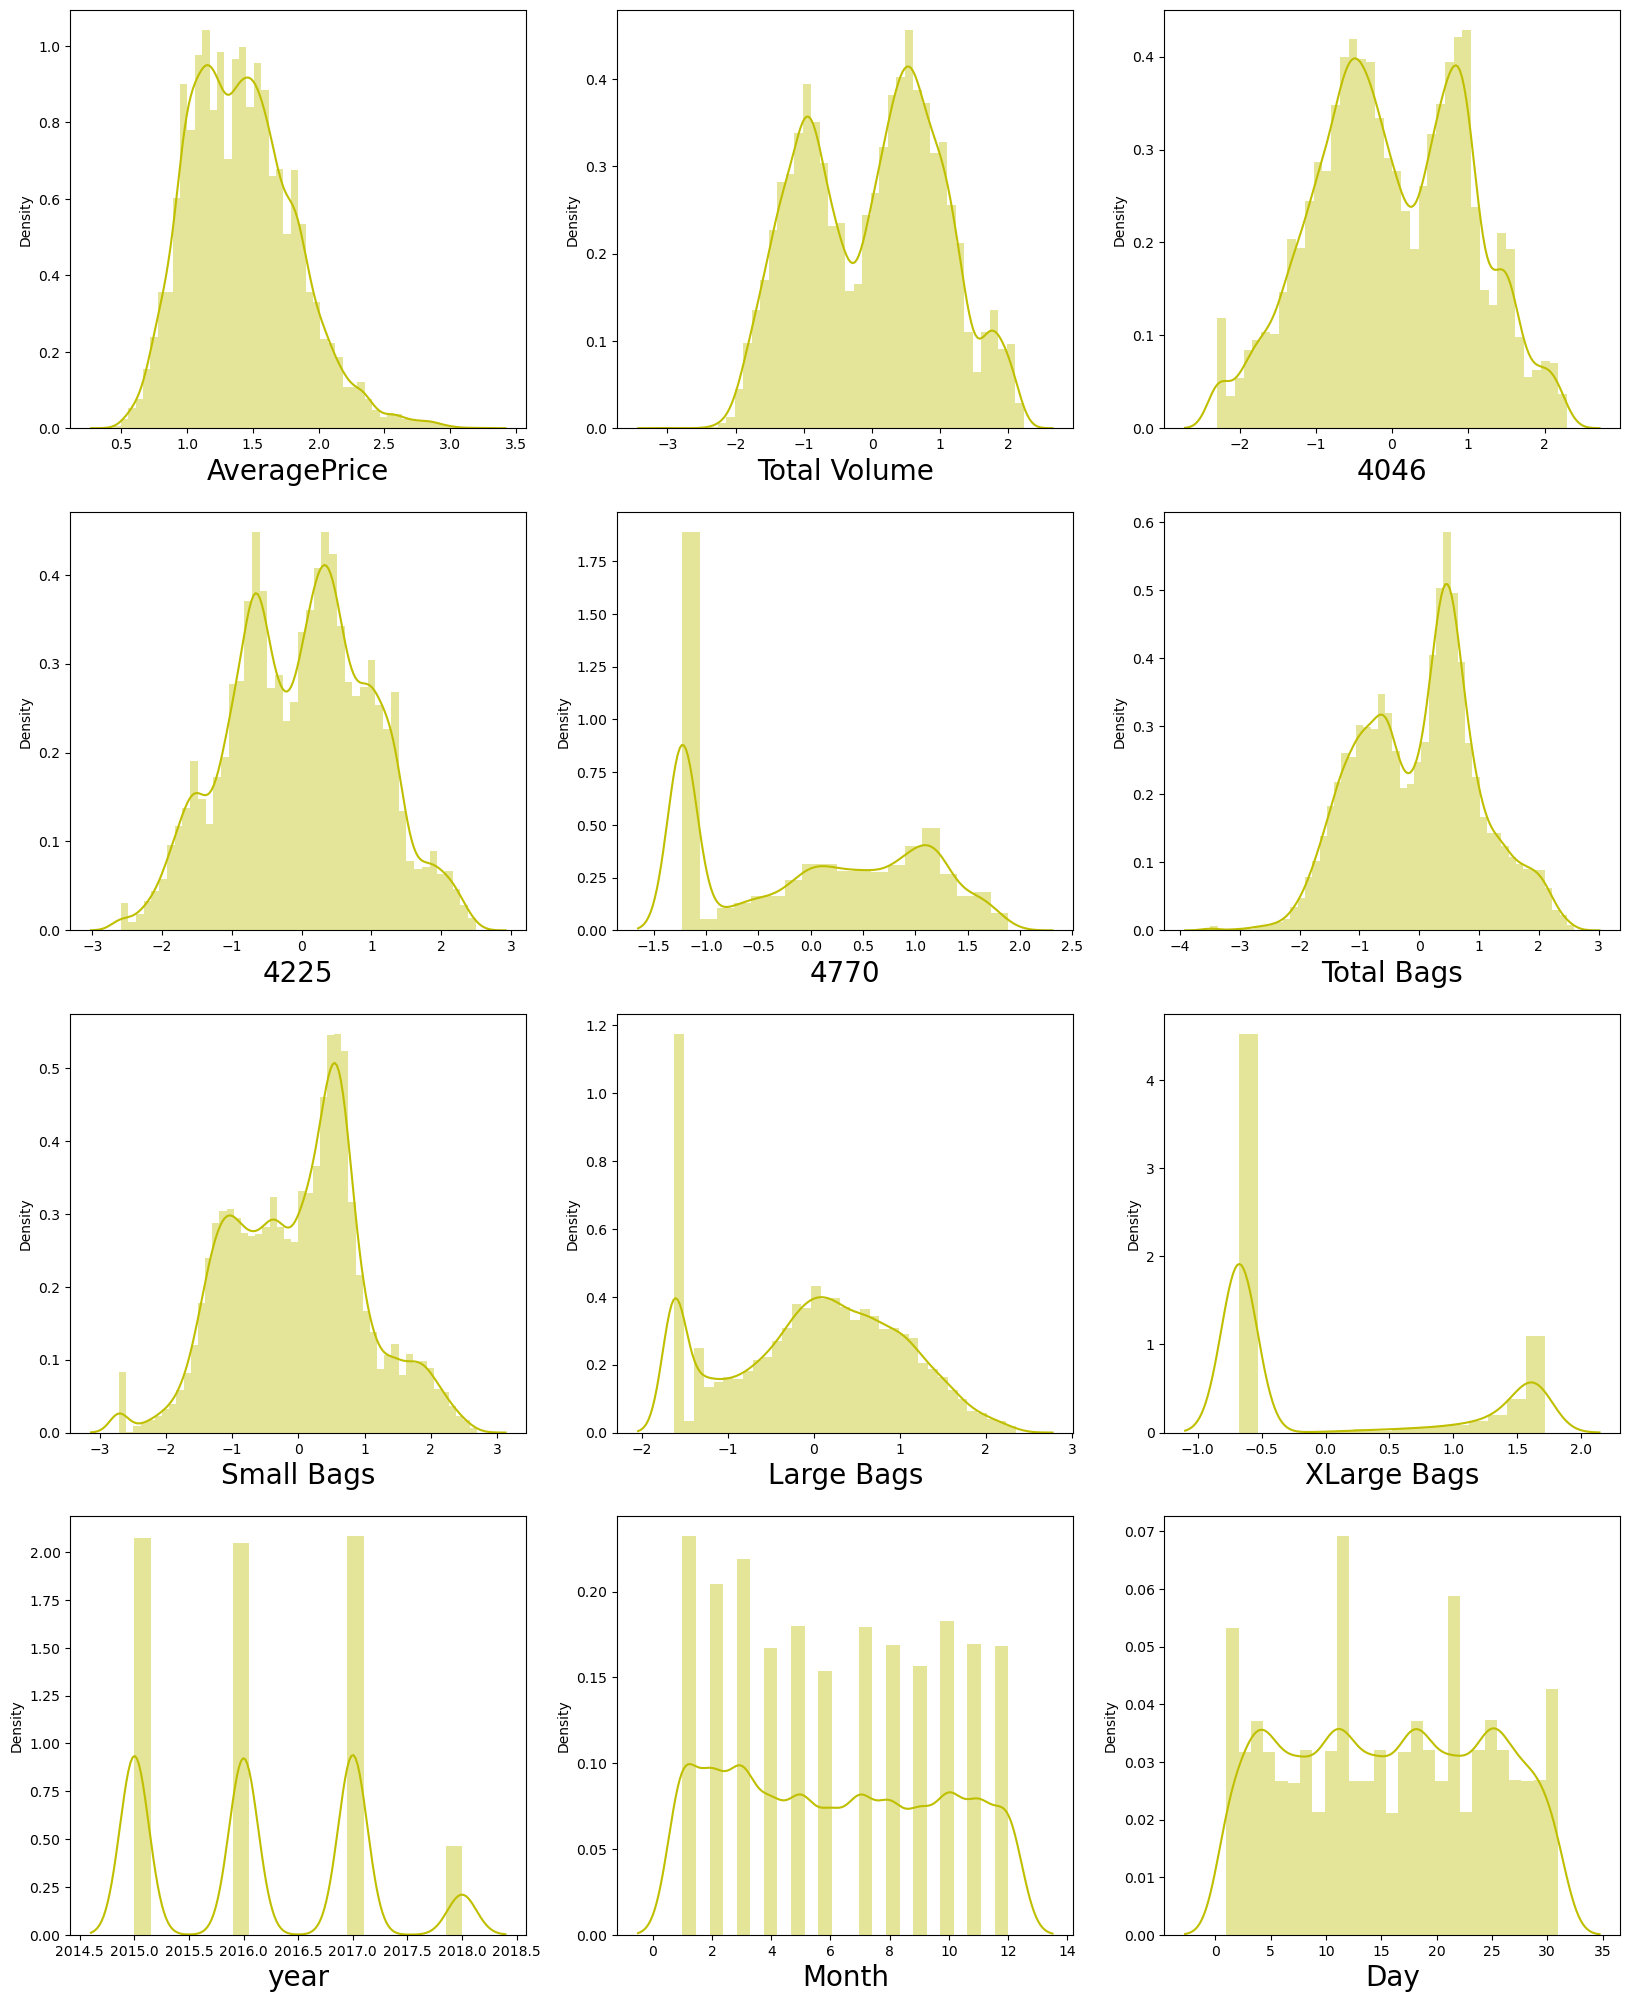

In [125]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=14:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(new_df[column],color='y')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [126]:
new_df["XLarge Bags"] = np.log1p(new_df["XLarge Bags"])
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

In [127]:
# let us try one more time for removal
f1=["XLarge Bags"]
new_df[f1] = sk.fit_transform(new_df[f1].values)
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.765164
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

# Encoding:

In [128]:
categorical_col = ["type","region"]
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)
new_df[categorical_col]

type  region
0         0       0
1         0       0
2         0       0
3         0       0
4         0       0
...     ...     ...
18244     1      53
18245     1      53
18246     1      53
18247     1      53
18248     1      53

[17782 rows x 2 columns]

# Correlation using HEAT map:

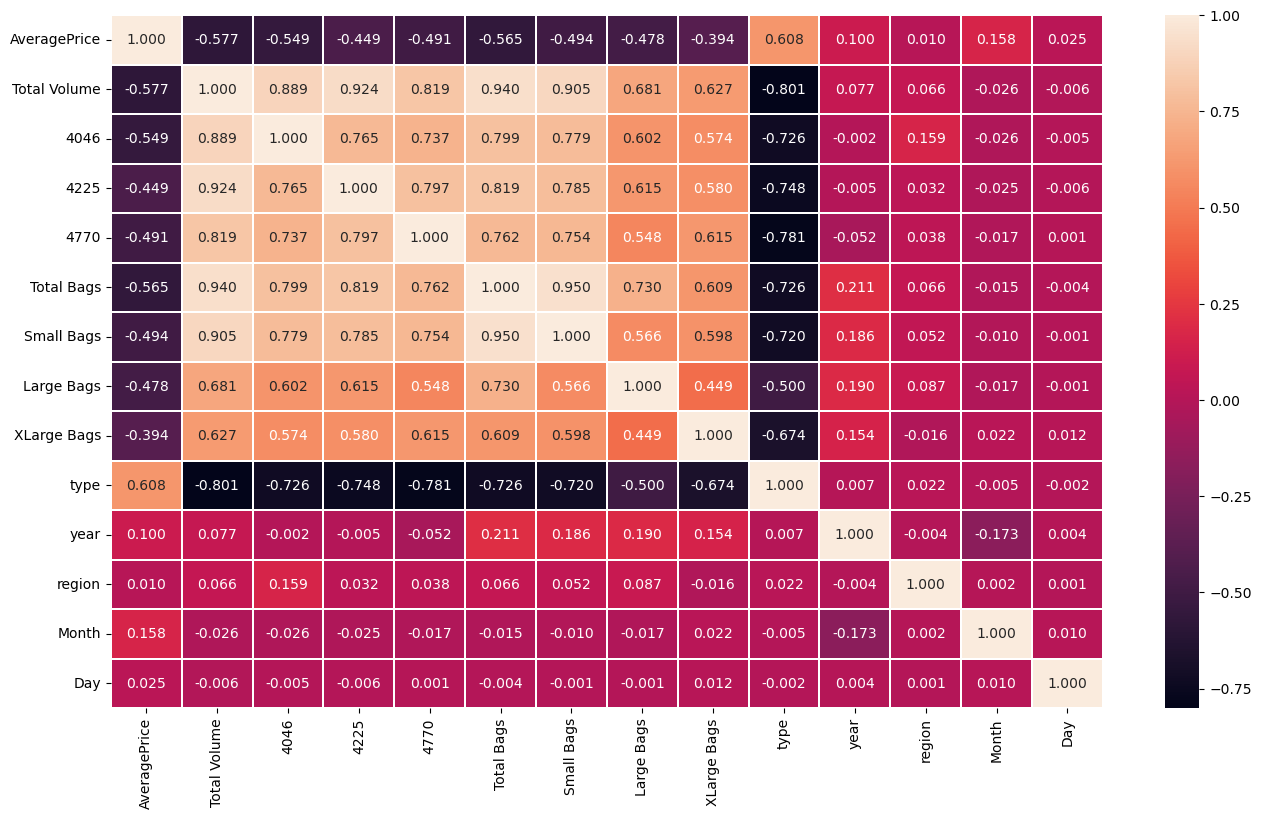

In [130]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(new_df.corr(),linewidths=.1,fmt='0.3f', annot = True)
plt.yticks(rotation=0)
plt.show()

In [131]:
#let us find the correlation with targetvariable
cor['region'].sort_values(ascending=False)

region          1.000000
4046            0.159390
Large Bags      0.086573
Total Bags      0.065996
Total Volume    0.065709
Small Bags      0.051985
4770            0.037805
4225            0.032273
type            0.021970
AveragePrice    0.010428
Month           0.002175
Day             0.000751
year           -0.003610
XLarge Bags    -0.015786
Name: region, dtype: float64

In [135]:
class_df=new_df

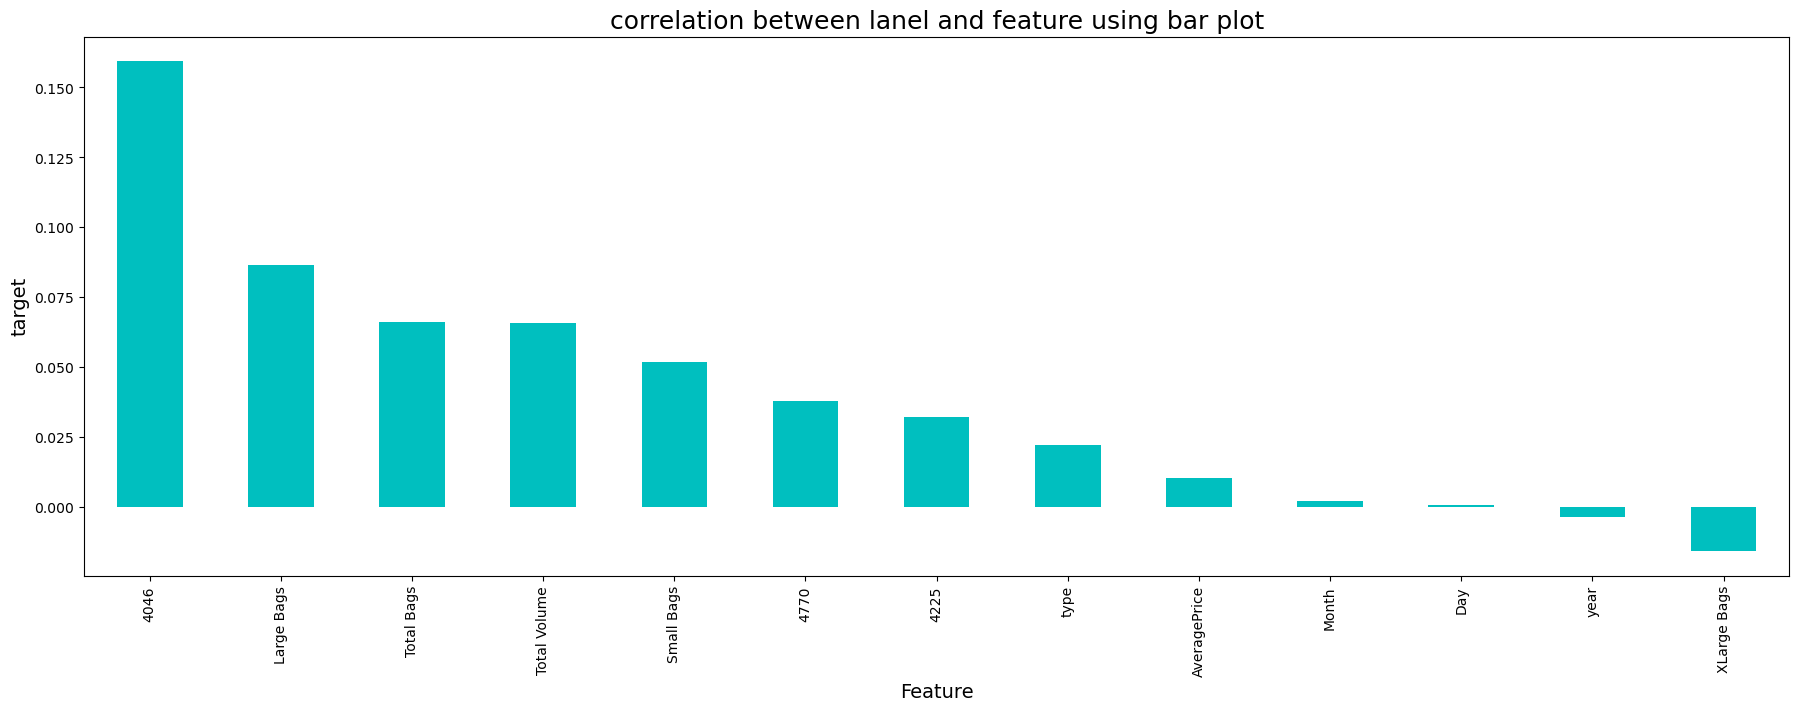

In [136]:
plt.figure(figsize=(22,7))
class_df.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

In [138]:
# Dropping irrelevant columns

class_df.drop("year",axis=1, inplace=True)
class_df.drop("type",axis=1, inplace=True)

# Separate Dependent and Independent Variables

In [140]:
x = class_df.drop("region", axis=1)
y = class_df["region"]
x

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0              1.33     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   
1              1.35     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   
2              0.93      0.215503 -0.724508  0.656010  0.034215   -0.556204   
3              1.08      0.029840 -0.625017  0.475615 -0.110976   -0.702370   
4              1.28     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   
...             ...           ...       ...       ...       ...         ...   
18244          1.63     -0.668931 -0.454078 -0.922232 -1.224990   -0.331042   
18245          1.71     -0.762380 -0.610403 -0.665649 -1.224990   -0.499550   
18246          1.87     -0.766344 -0.610350 -0.774395  0.455355   -0.493424   
18247          1.93     -0.692595 -0.539211 -0.711605  0.455045   -0.424475   
18248          1.62     -0.658062 -0.351503 -0.787209  0.168008   -0.383676   

       Small Bags  Large Bags  XLarge Bags  Month  Day  
0       -0.337064   -0.775214    -0.689355     12   27  
1       -0.301038   -0.765237    -0.689355     12   20  
2       -0.364044   -0.752534    -0.689355     12   13  
3       -0.500341   -0.693012    -0.689355     12    6  
4       -0.479918   -0.600755    -0.689355     11   29  
...           ...         ...          ...    ...  ...  
18244   -0.165765   -0.405895    -0.689355      2    4  
18245   -0.321645   -0.478556    -0.689355      1   28  
18246   -0.303466   -0.945246    -0.689355      1   21  
18247   -0.240252   -0.910471    -0.689355      1   14  
18248   -0.201685   -1.042930    -0.689355      1    7  

[17782 rows x 11 columns]

In [141]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [142]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values      Features
0     1.796373  AveragePrice
1    51.399698  Total Volume
2     6.712704          4046
3    11.930976          4225
4     3.456265          4770
5    33.528776    Total Bags
6    17.097278    Small Bags
7     3.434654    Large Bags
8     1.770814   XLarge Bags
9     1.040292         Month
10    1.001455           Day

In [143]:
x.drop('Total Volume',inplace=True,axis=1)

In [144]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values      Features
0    1.691770  AveragePrice
1    3.448653          4046
2    4.141881          4225
3    3.456243          4770
4   25.378186    Total Bags
5   17.068323    Small Bags
6    3.376010    Large Bags
7    1.770566   XLarge Bags
8    1.039983         Month
9    1.001453           Day

In [145]:
x.drop('Total Bags',inplace=True,axis=1)

In [146]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values      Features
0    1.602696  AveragePrice
1    3.448597          4046
2    3.976580          4225
3    3.444585          4770
4    3.547060    Small Bags
5    1.819050    Large Bags
6    1.770217   XLarge Bags
7    1.038334         Month
8    1.001413           Day

In [153]:
#Lets use any other feature selection technique
from sklearn.feature_selection import SelectKBest,f_classif
select_feature=SelectKBest(score_func=f_classif,k=9)
fit=select_feature.fit(x,y)
score=pd.DataFrame(fit.scores_)
column=pd.DataFrame(x.columns)

best_feature=pd.concat([column,score],axis=1)
best_feature.columns=['Feature','Score']
print(best_feature.nlargest(14,'Score'))

        Feature       Score
1          4046  180.309702
5    Large Bags  159.457692
2          4225  142.620675
4    Small Bags  128.822420
3          4770   83.840618
0  AveragePrice   66.630123
6   XLarge Bags   26.531360
7         Month    0.095671
8           Day    0.019846


In [154]:
data.drop(columns=['Month','Day'],inplace=True)


# Build Model

In [164]:
#Lets create with LogisticRegression and DecisiontreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score,classification_report
from sklearn.model_selection import cross_val_score

In [165]:
#Lets make one fucntion to check accuracy again and again
def metrics_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("======================Training Score===================")
        print("Accuracy Score  ==> ",accuracy_score(y_train,y_pred))
    elif train==False:
        pred=clf.predict(x_test)
        print("======================Testing Score====================")
        print("Accuracy Score==>  ",accuracy_score(y_test,pred))
        print("Classification Report==> ",classification_report(y_test,pred))
        print("Confusion Matrix==> ",confusion_matrix(y_test,pred))
        cv_score = (cross_val_score(clf, x, y, cv=5).mean())*100
        print("Cross Validation Score:", cv_score)


In [166]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.7905538375035142  on Random_state  116


In [167]:
#spliting the data 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=116)

In [168]:
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [169]:
metrics_score(DTC,x_train,x_test,y_train,y_test,train=True)
metrics_score(DTC,x_train,x_test,y_train,y_test,train=False)

======================Training Score===================
Accuracy Score  ==>  1.0
======================Testing Score====================
Accuracy Score==>   0.7956142816980601
Classification Report==>                precision    recall  f1-score   support

           0       0.77      0.73      0.75        74
           1       0.64      0.74      0.69        61
           2       0.91      0.97      0.94        72
           3       0.78      0.81      0.79        52
           4       0.94      0.81      0.87        78
           5       0.67      0.70      0.68        63
           6       0.97      0.92      0.94        73
           7       0.80      0.91      0.85        56
           8       0.92      0.92      0.92        64
           9       0.78      0.77      0.78        70
          10       0.73      0.62      0.67        82
          11       0.84      0.92      0.88        75
          12       0.94      0.86      0.89        69
          13       0.67      0.75      0.

# Logistic Regression

In [170]:
#Lets check with Logistic Regression (It wont work perfectly because its multiclass prediction)
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state =i)
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.3297722800112454  on Random_state  116


In [171]:
#spliting the data 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=116)

In [172]:
lr.fit(x_train,y_train)

LogisticRegression()

In [173]:
metrics_score(lr,x_train,x_test,y_train,y_test,train=True)
metrics_score(lr,x_train,x_test,y_train,y_test,train=False)

======================Training Score===================
Accuracy Score  ==>  0.3161335676625659
======================Testing Score====================
Accuracy Score==>   0.3297722800112454
Classification Report==>                precision    recall  f1-score   support

           0       0.37      0.31      0.34        74
           1       0.13      0.23      0.16        61
           2       0.53      0.39      0.45        72
           3       0.22      0.37      0.28        52
           4       0.40      0.33      0.36        78
           5       0.08      0.06      0.07        63
           6       0.71      0.67      0.69        73
           7       0.30      0.43      0.36        56
           8       0.57      0.64      0.60        64
           9       0.45      0.64      0.53        70
          10       0.17      0.04      0.06        82
          11       0.44      0.41      0.42        75
          12       0.19      0.30      0.23        69
          13       0.03   

So, Here i am selecting Decision Tree to build model

In [178]:
metrics_score(DTC,x_train,x_test,y_train,y_test,train=True)
metrics_score(DTC,x_train,x_test,y_train,y_test,train=False)

======================Training Score===================
Accuracy Score  ==>  1.0
======================Testing Score====================
Accuracy Score==>   0.7956142816980601
Classification Report==>                precision    recall  f1-score   support

           0       0.77      0.73      0.75        74
           1       0.64      0.74      0.69        61
           2       0.91      0.97      0.94        72
           3       0.78      0.81      0.79        52
           4       0.94      0.81      0.87        78
           5       0.67      0.70      0.68        63
           6       0.97      0.92      0.94        73
           7       0.80      0.91      0.85        56
           8       0.92      0.92      0.92        64
           9       0.78      0.77      0.78        70
          10       0.73      0.62      0.67        82
          11       0.84      0.92      0.88        75
          12       0.94      0.86      0.89        69
          13       0.67      0.75      0.

In [185]:
#We are tuning four important hyperparameter right now, we are passing the different values for both paramters.


grid_param={

    'max_depth': range(10,15),# The Maximum depth of the tree
    'min_samples_leaf':range(2,6),#The maximum number of samples required to be at a leaf node
    'min_samples_split':range(3,8),#The minimum numbers of sample required to split an internal node
    'max_leaf_nodes':range(5,10)}#Best nodes are defined as them unlimited number of leaf nodes

#criterian

In [186]:
grid_search=GridSearchCV(estimator=cnn,
                         param_grid=grid_param,
                         cv=5,
                        n_jobs=-1)#use all the cores in your system for performance improvement .

In [187]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=11, max_leaf_nodes=9,
                                             min_samples_leaf=2,
                                             min_samples_split=7),
             n_jobs=-1,
             param_grid={'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [188]:
best_parameter=grid_search.best_params_
print(best_parameter)

{'max_depth': 10, 'max_leaf_nodes': 9, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [189]:
#Initiate DecisionTreeClassifier with new parameter and train.

cnn=DecisionTreeClassifier(max_depth=10,max_leaf_nodes=9,min_samples_split= 3)

In [191]:
cnn.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=9, min_samples_split=3)

In [192]:
#Call the function and pass dataset to check train and test score
metrics_score(cnn,x_train,x_test,y_train,y_test,train=True)
metrics_score(cnn,x_train,x_test,y_train,y_test,train=False)

======================Training Score===================
Accuracy Score  ==>  0.09068541300527241
======================Testing Score====================
Accuracy Score==>   0.08518414394152375
Classification Report==>                precision    recall  f1-score   support

           0       0.00      0.00      0.00        74
           1       0.00      0.00      0.00        61
           2       0.00      0.00      0.00        72
           3       0.00      0.00      0.00        52
           4       0.00      0.00      0.00        78
           5       0.00      0.00      0.00        63
           6       0.00      0.00      0.00        73
           7       0.02      1.00      0.05        56
           8       0.78      0.50      0.61        64
           9       0.00      0.00      0.00        70
          10       0.00      0.00      0.00        82
          11       0.00      0.00      0.00        75
          12       0.00      0.00      0.00        69
          13       0.00 

# ROC Curve

In [196]:
from sklearn.metrics import roc_curve, auc

In [199]:
#predicting the data
y_pred_cnb = cnn.predict(x_test)
y_prob_pred_cnb = cnn.predict_proba(x_test)

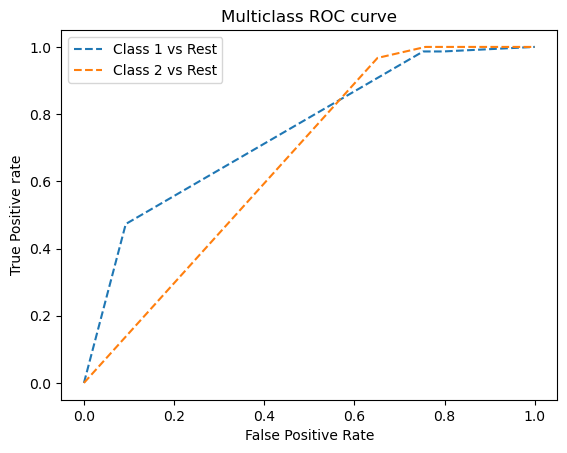

In [200]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 54

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred_cnb[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--', label='Class 1 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--', label='Class 2 vs Rest')


plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [202]:
import pickle
filename=('Pranathi Decision Tree Classifier')
pickle.dump(cnn,open(filename,'wb'))

# Conclusion

In [203]:
loaded_model=pickle.load(open('Pranathi Decision Tree Classifier','rb'))
result=cnn.score(x_test,y_test)
print(result*100)

8.518414394152375


In [204]:
#Call the function and pass dataset to check train and test score
metrics_score(cnn,x_train,x_test,y_train,y_test,train=True)
metrics_score(cnn,x_train,x_test,y_train,y_test,train=False)

======================Training Score===================
Accuracy Score  ==>  0.09068541300527241
======================Testing Score====================
Accuracy Score==>   0.08518414394152375
Classification Report==>                precision    recall  f1-score   support

           0       0.00      0.00      0.00        74
           1       0.00      0.00      0.00        61
           2       0.00      0.00      0.00        72
           3       0.00      0.00      0.00        52
           4       0.00      0.00      0.00        78
           5       0.00      0.00      0.00        63
           6       0.00      0.00      0.00        73
           7       0.02      1.00      0.05        56
           8       0.78      0.50      0.61        64
           9       0.00      0.00      0.00        70
          10       0.00      0.00      0.00        82
          11       0.00      0.00      0.00        75
          12       0.00      0.00      0.00        69
          13       0.00 

In [ ]:
#Intern at Pranathi 
#Student of DataTrained - Saurav
#Date - 7- April - 2023
#Time - 13-03